In [440]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.select import Select
from statsmodels.stats import weightstats
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist
import pickle

In [160]:
request = requests.get('https://stats.nba.com/players/touches/?sort=PLAYER_NAME&dir=-1')
soup = BeautifulSoup(request.content, 'html.parser')

In [161]:
table = soup.find('nba-stat-table')

In [82]:
table(class_='nba-stat-table')

[]

In [2]:
driver = webdriver.Chrome('/Users/KevinSun/flatiron/final_project/chromedriver')
driver.get('https://stats.nba.com/players/touches/?Season=2013-14&SeasonType=Regular%20Season')

In [3]:
#navigate to all players
obj = Select(driver.find_element_by_xpath('/html/body/main/div[2]/div/div[2]/div/div/nba-stat-table/div[1]/div/div/select'))
obj.select_by_index(0)

In [4]:
players = driver.find_elements_by_xpath('//td[@class="player"]')

In [5]:
teams = driver.find_elements_by_xpath('//td[@class="text"]')

In [188]:
len(teams)

482

In [6]:
stats = driver.find_elements_by_xpath('//tr[@data-ng-repeat="(i, row) in page track by row.$hash"]')

In [7]:
#column names
columns = driver.find_elements_by_tag_name('th')
cols_touches = []
for i in range(20):
    cols_touches.append(columns[i].text)
    
cols_touches
   

['PLAYER',
 'TEAM',
 'GP',
 'W',
 'L',
 'MIN',
 'PTS',
 'TOUCHES',
 'FRONT CT\nTOUCHES',
 'TIME OF\nPOSS',
 'AVG SEC PER\nTOUCH',
 'AVG DRIB PER\nTOUCH',
 'PTS PER\nTOUCH',
 'ELBOW\nTOUCHES',
 'POST\nUPS',
 'PAINT\nTOUCHES',
 'PTS PER\nELBOW TOUCH',
 'PTS PER\nPOST TOUCH',
 'PTS PER\nPAINT TOUCH',
 'PLAYER']

In [8]:
stats[481].text,stats[480].text
stats_list_touches = []
for i in range(482):
    stats_list_touches.append(stats[i].text)
stats_list_touches

['AJ Price\nMIN 28 15 13 3.5 1.6 8.7 3.2 0.7 5.08 4.78 0.180 0.0 0.0 0.0 0.000 0.000 0.000',
 'Aaron Brooks\nDEN 72 42 30 21.6 9.0 39.7 15.0 3.4 5.06 5.32 0.226 0.3 0.0 0.7 0.000 0.000 0.360',
 'Aaron Gray\nSAC 36 11 25 9.7 1.7 14.0 7.4 0.4 1.65 0.40 0.121 1.6 0.4 2.0 0.102 0.308 0.592',
 'Adonis Thomas\nPHI 6 2 4 6.3 2.3 6.3 4.7 0.2 2.08 1.05 0.368 0.0 0.2 0.0 0.000 2.000 0.000',
 'Al Harrington\nWAS 33 20 13 15.0 6.6 24.9 15.1 0.6 1.47 0.58 0.264 0.7 0.6 1.2 0.500 0.200 0.707',
 'Al Horford\nATL 29 16 13 33.0 18.6 63.0 40.6 1.8 1.75 0.49 0.295 6.7 7.1 7.7 0.436 0.510 0.869',
 'Al Jefferson\nCHA 72 37 35 35.0 21.8 49.7 38.6 1.9 2.34 0.59 0.439 5.2 19.8 7.5 0.493 0.570 0.907',
 'Al-Farouq Aminu\nNOP 80 33 47 25.6 7.2 31.5 21.4 1.1 2.11 1.03 0.227 1.4 0.5 3.1 0.389 0.378 0.761',
 'Alan Anderson\nBKN 77 42 35 22.7 7.1 26.8 16.9 1.3 2.81 1.83 0.267 0.3 0.2 0.6 0.450 0.368 0.551',
 'Alec Burks\nUTA 78 24 54 28.1 14.0 53.6 37.8 3.0 3.39 2.78 0.260 1.5 0.1 1.4 0.649 1.100 1.177',
 'Alex Len\

In [11]:
driver.get('https://stats.nba.com/players/pullup/?Season=2013-14&SeasonType=Regular%20Season')
obj = Select(driver.find_element_by_xpath('/html/body/main/div[2]/div/div[2]/div/div/nba-stat-table/div[1]/div/div/select'))
obj.select_by_index(0)

In [12]:
pullup_stats = driver.find_elements_by_xpath('//tr[@data-ng-repeat="(i, row) in page track by row.$hash"]')
len(pullup_stats)

stats_list_pullup = []
for i in range(482):
    stats_list_pullup.append(pullup_stats[i].text)

stats_list_pullup
    

['AJ Price\nMIN 28 15 13 3.5 0.6 0.3 0.9 36.0 0.0 0.3 0.0 36.0',
 'Aaron Brooks\nDEN 72 42 30 21.6 2.2 0.9 2.6 34.0 0.4 1.3 30.1 41.5',
 'Aaron Gray\nSAC 37 12 25 9.6 0.0 0.0 0.0 0.0 0.0 0.0 - 0.0',
 'Adonis Thomas\nPHI 6 2 4 6.3 1.0 0.5 0.5 100 0.0 0.0 - 100',
 'Al Harrington\nWAS 34 20 14 15.0 0.1 0.1 0.5 12.5 0.0 0.1 0.0 12.5',
 'Al Horford\nATL 29 16 13 33.0 0.4 0.2 0.8 25.0 0.0 0.1 0.0 25.0',
 'Al Jefferson\nCHA 73 38 35 35.0 1.4 0.7 1.7 40.8 0.0 0.0 100 41.6',
 'Al-Farouq Aminu\nNOP 80 33 47 25.6 0.3 0.2 0.4 34.3 0.0 0.0 0.0 34.3',
 'Alan Anderson\nBKN 78 43 35 22.7 1.1 0.5 1.5 33.3 0.1 0.5 25.0 37.6',
 'Alec Burks\nUTA 78 24 54 28.1 2.5 1.2 3.3 34.9 0.1 0.6 22.0 37.0',
 'Alex Len\nPHX 42 24 18 8.6 0.1 0.0 0.1 33.3 - - - 33.3',
 'Alexey Shved\nMIN 63 28 35 10.5 0.7 0.3 1.2 22.1 0.2 0.7 31.0 30.5',
 'Alexis Ajinca\nNOP 56 22 34 17.0 0.1 0.0 0.1 33.3 0.0 0.0 0.0 33.3',
 'Allen Crabbe\nPOR 15 12 3 6.7 0.5 0.2 0.5 37.5 0.1 0.1 100 43.8',
 'Alonzo Gee\nCLE 65 29 36 15.7 0.2 0.1 0.7 13

In [13]:
columns_pullup = driver.find_elements_by_tag_name('th')
cols_pullup = []
for i in range(len(columns_pullup)):
    cols_pullup.append(columns_pullup[i].text)
    
cols_pullup

['PLAYER',
 'TEAM',
 'GP',
 'W',
 'L',
 'MIN',
 'PTS',
 'FGM',
 'FGA',
 'FG%',
 '3PM',
 '3PA',
 '3P%',
 'EFG%',
 'PLAYER']

In [441]:
driver.close()

In [14]:
d = stats_list_pullup[0].split('\n')
d[1].split(" ")

cleaned = []
for i in stats_list_pullup:
    x = i.split('\n')
    y = x[1].split(" ")
    empty = [x[0]]
    for j in range(len(y)):
        empty.append(y[j])
    cleaned.append(empty)

cleaned

[['AJ Price',
  'MIN',
  '28',
  '15',
  '13',
  '3.5',
  '0.6',
  '0.3',
  '0.9',
  '36.0',
  '0.0',
  '0.3',
  '0.0',
  '36.0'],
 ['Aaron Brooks',
  'DEN',
  '72',
  '42',
  '30',
  '21.6',
  '2.2',
  '0.9',
  '2.6',
  '34.0',
  '0.4',
  '1.3',
  '30.1',
  '41.5'],
 ['Aaron Gray',
  'SAC',
  '37',
  '12',
  '25',
  '9.6',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '0.0',
  '-',
  '0.0'],
 ['Adonis Thomas',
  'PHI',
  '6',
  '2',
  '4',
  '6.3',
  '1.0',
  '0.5',
  '0.5',
  '100',
  '0.0',
  '0.0',
  '-',
  '100'],
 ['Al Harrington',
  'WAS',
  '34',
  '20',
  '14',
  '15.0',
  '0.1',
  '0.1',
  '0.5',
  '12.5',
  '0.0',
  '0.1',
  '0.0',
  '12.5'],
 ['Al Horford',
  'ATL',
  '29',
  '16',
  '13',
  '33.0',
  '0.4',
  '0.2',
  '0.8',
  '25.0',
  '0.0',
  '0.1',
  '0.0',
  '25.0'],
 ['Al Jefferson',
  'CHA',
  '73',
  '38',
  '35',
  '35.0',
  '1.4',
  '0.7',
  '1.7',
  '40.8',
  '0.0',
  '0.0',
  '100',
  '41.6'],
 ['Al-Farouq Aminu',
  'NOP',
  '80',
  '33',
  '47',
  '25.6',
  '

['AJ Price\nMIN 28 15 13 3.5 1.6 8.7 3.2 0.7 5.08 4.78 0.180 0.0 0.0 0.0 0.000 0.000 0.000',
 'Aaron Brooks\nDEN 72 42 30 21.6 9.0 39.7 15.0 3.4 5.06 5.32 0.226 0.3 0.0 0.7 0.000 0.000 0.360',
 'Aaron Gray\nSAC 36 11 25 9.7 1.7 14.0 7.4 0.4 1.65 0.40 0.121 1.6 0.4 2.0 0.102 0.308 0.592',
 'Adonis Thomas\nPHI 6 2 4 6.3 2.3 6.3 4.7 0.2 2.08 1.05 0.368 0.0 0.2 0.0 0.000 2.000 0.000',
 'Al Harrington\nWAS 33 20 13 15.0 6.6 24.9 15.1 0.6 1.47 0.58 0.264 0.7 0.6 1.2 0.500 0.200 0.707',
 'Al Horford\nATL 29 16 13 33.0 18.6 63.0 40.6 1.8 1.75 0.49 0.295 6.7 7.1 7.7 0.436 0.510 0.869',
 'Al Jefferson\nCHA 72 37 35 35.0 21.8 49.7 38.6 1.9 2.34 0.59 0.439 5.2 19.8 7.5 0.493 0.570 0.907',
 'Al-Farouq Aminu\nNOP 80 33 47 25.6 7.2 31.5 21.4 1.1 2.11 1.03 0.227 1.4 0.5 3.1 0.389 0.378 0.761',
 'Alan Anderson\nBKN 77 42 35 22.7 7.1 26.8 16.9 1.3 2.81 1.83 0.267 0.3 0.2 0.6 0.450 0.368 0.551',
 'Alec Burks\nUTA 78 24 54 28.1 14.0 53.6 37.8 3.0 3.39 2.78 0.260 1.5 0.1 1.4 0.649 1.100 1.177',
 'Alex Len\

In [15]:
# cleaning function
def clean_data(stats_list):
    cleaned = []
    for i in stats_list:
        x = i.split('\n')
        y = x[1].split(" ")
        empty = [x[0]]
        for j in range(len(y)):
            empty.append(y[j])
        cleaned.append(empty)
    return cleaned

def clean_cols(columns_list):
    cols_fixed = []
    for i in columns_list:
        x = i.replace('\n',' ')
        cols_fixed.append(x)
    return cols_fixed[:-1]

def make_df(cols, data):
    df = pd.DataFrame(data, columns = cols)
    return df

In [16]:
touches = clean_data(stats_list_touches)
pullups = clean_data(stats_list_pullup)

In [306]:
#create dataframe
len(pullups[0])
#cols_pullup = cols_pullup[:-1]
df_pullup_13 = pd.DataFrame(pullups, columns = cols_pullup)

In [307]:
df_pullup_13

,PLAYER,TEAM,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,EFG%
0,AJ Price,MIN,28,15,13,3.5,0.6,0.3,0.9,36.0,0.0,0.3,0.0,36.0
1,Aaron Brooks,DEN,72,42,30,21.6,2.2,0.9,2.6,34.0,0.4,1.3,30.1,41.5
2,Aaron Gray,SAC,37,12,25,9.6,0.0,0.0,0.0,0.0,0.0,0.0,-,0.0
3,Adonis Thomas,PHI,6,2,4,6.3,1.0,0.5,0.5,100,0.0,0.0,-,100
4,Al Harrington,WAS,34,20,14,15.0,0.1,0.1,0.5,12.5,0.0,0.1,0.0,12.5
5,Al Horford,ATL,29,16,13,33.0,0.4,0.2,0.8,25.0,0.0,0.1,0.0,25.0
6,Al Jefferson,CHA,73,38,35,35.0,1.4,0.7,1.7,40.8,0.0,0.0,100,41.6
7,Al-Farouq Aminu,NOP,80,33,47,25.6,0.3,0.2,0.4,34.3,0.0,0.0,0.0,34.3
8,Alan Anderson,BKN,78,43,35,22.7,1.1,0.5,1.5,33.3,0.1,0.5,25.0,37.6
9,Alec Burks,UTA,78,24,54,28.1,2.5,1.2,3.3,34.9,0.1,0.6,22.0,37.0


In [335]:
#cols_touches = cols_touches[:-1]
df_touches_13 = pd.DataFrame(touches, columns = cols_touches_fixed)

In [336]:
df_touches_13

,PLAYER,TEAM,GP,W,L,MIN,PTS,TOUCHES,FRONT CT TOUCHES,TIME OF POSS,AVG SEC PER TOUCH,AVG DRIB PER TOUCH,PTS PER TOUCH,ELBOW TOUCHES,POST UPS,PAINT TOUCHES,PTS PER ELBOW TOUCH,PTS PER POST TOUCH,PTS PER PAINT TOUCH
0,AJ Price,MIN,28,15,13,3.5,1.6,8.7,3.2,0.7,5.08,4.78,0.180,0.0,0.0,0.0,0.000,0.000,0.000
1,Aaron Brooks,DEN,72,42,30,21.6,9.0,39.7,15.0,3.4,5.06,5.32,0.226,0.3,0.0,0.7,0.000,0.000,0.360
2,Aaron Gray,SAC,36,11,25,9.7,1.7,14.0,7.4,0.4,1.65,0.40,0.121,1.6,0.4,2.0,0.102,0.308,0.592
3,Adonis Thomas,PHI,6,2,4,6.3,2.3,6.3,4.7,0.2,2.08,1.05,0.368,0.0,0.2,0.0,0.000,2.000,0.000
4,Al Harrington,WAS,33,20,13,15.0,6.6,24.9,15.1,0.6,1.47,0.58,0.264,0.7,0.6,1.2,0.500,0.200,0.707
5,Al Horford,ATL,29,16,13,33.0,18.6,63.0,40.6,1.8,1.75,0.49,0.295,6.7,7.1,7.7,0.436,0.510,0.869
6,Al Jefferson,CHA,72,37,35,35.0,21.8,49.7,38.6,1.9,2.34,0.59,0.439,5.2,19.8,7.5,0.493,0.570,0.907
7,Al-Farouq Aminu,NOP,80,33,47,25.6,7.2,31.5,21.4,1.1,2.11,1.03,0.227,1.4,0.5,3.1,0.389,0.378,0.761
8,Alan Anderson,BKN,77,42,35,22.7,7.1,26.8,16.9,1.3,2.81,1.83,0.267,0.3,0.2,0.6,0.450,0.368,0.551
9,Alec Burks,UTA,78,24,54,28.1,14.0,53.6,37.8,3.0,3.39,2.78,0.260,1.5,0.1,1.4,0.649,1.100,1.177


In [340]:
df_touches_13['POST UPS']

0       0.0
1       0.0
2       0.4
3       0.2
4       0.6
5       7.1
6      19.8
7       0.5
8       0.2
9       0.1
10      0.7
11      0.0
12      0.9
13      0.0
14      0.1
15      5.2
16      1.2
17      1.2
18      3.1
19      1.6
20      1.3
21      1.6
22      0.1
23      2.3
24      0.8
25      0.7
26      8.8
27      2.3
28      0.0
29      0.2
       ... 
452     0.0
453     0.9
454     0.7
455     1.7
456     0.0
457     3.0
458     0.0
459     0.1
460     0.8
461     0.6
462     1.5
463     0.0
464     0.6
465     0.2
466     0.0
467     0.2
468     0.2
469     0.2
470     1.7
471     1.8
472     0.0
473     0.2
474     3.3
475     0.1
476     0.0
477     0.1
478     1.0
479     0.1
480    17.3
481     3.0
Name: POST UPS, Length: 482, dtype: object

In [327]:
cols_touches_fixed = []
for i in cols_touches:
    x = i.replace('\n',' ')
    print(i)
    print('\n')
    print(x)
    print('\n')
    print('\n')
    cols_touches_fixed.append(x)


PLAYER


PLAYER




TEAM


TEAM




GP


GP




W


W




L


L




MIN


MIN




PTS


PTS




TOUCHES


TOUCHES




FRONT CT
TOUCHES


FRONT CT TOUCHES




TIME OF
POSS


TIME OF POSS




AVG SEC PER
TOUCH


AVG SEC PER TOUCH




AVG DRIB PER
TOUCH


AVG DRIB PER TOUCH




PTS PER
TOUCH


PTS PER TOUCH




ELBOW
TOUCHES


ELBOW TOUCHES




POST
UPS


POST UPS




PAINT
TOUCHES


PAINT TOUCHES




PTS PER
ELBOW TOUCH


PTS PER ELBOW TOUCH




PTS PER
POST TOUCH


PTS PER POST TOUCH




PTS PER
PAINT TOUCH


PTS PER PAINT TOUCH






In [334]:
cols_touches_fixed

['PLAYER',
 'TEAM',
 'GP',
 'W',
 'L',
 'MIN',
 'PTS',
 'TOUCHES',
 'FRONT CT TOUCHES',
 'TIME OF POSS',
 'AVG SEC PER TOUCH',
 'AVG DRIB PER TOUCH',
 'PTS PER TOUCH',
 'ELBOW TOUCHES',
 'POST UPS',
 'PAINT TOUCHES',
 'PTS PER ELBOW TOUCH',
 'PTS PER POST TOUCH',
 'PTS PER PAINT TOUCH']

In [17]:
#2016
driver.get('https://stats.nba.com/players/hustle/?Season=2016-17&SeasonType=Regular%20Season')

In [18]:
obj = Select(driver.find_element_by_xpath('/html/body/main/div[2]/div/div[2]/div/div/nba-stat-table/div[1]/div/div/select'))
obj.select_by_index(0)
hustle_stats = driver.find_elements_by_xpath('//tr[@data-ng-repeat="(i, row) in page track by row.$hash"]')

In [19]:
stats_list_hustle = []
for i in range(486):
    stats_list_hustle.append(hustle_stats[i].text)

stats_list_hustle

['AJ Hammons\nDAL 24 22 7.4 1.0 2.3 0.2 0.0 0.0 0.1 0.0 0.0 0.00 2.0 0.4 2.4',
 'Aaron Brooks\nIND 32 65 13.7 0.2 0.6 0.8 0.0 0.0 0.3 0.0 0.0 0.12 1.6 1.6 3.1',
 'Aaron Gordon\nORL 21 80 28.7 0.5 1.1 1.4 0.0 0.0 0.8 0.0 0.0 0.06 4.0 2.2 6.2',
 'Aaron Harrison\nCHA 22 5 3.3 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.00 0.4 0.0 0.4',
 'Adreian Payne\nMIN 26 18 7.5 0.3 0.7 0.6 0.0 0.0 0.1 0.0 0.0 0.00 1.3 1.1 2.4',
 'Al Horford\nBOS 31 68 32.3 3.3 7.7 1.4 0.0 0.0 1.1 0.0 0.0 0.00 9.4 3.6 13.0',
 'Al Jefferson\nIND 32 66 14.1 1.7 3.7 0.6 0.0 0.0 0.3 0.0 0.0 0.14 3.7 0.5 4.2',
 'Al-Farouq Aminu\nPOR 26 61 29.1 1.8 4.1 1.7 0.0 0.0 0.8 0.0 0.0 0.02 6.9 2.9 9.8',
 'Alan Anderson\nLAC 34 30 10.3 0.0 0.1 0.3 0.0 0.0 0.3 0.0 0.0 0.00 0.5 1.2 1.7',
 'Alan Williams\nPHX 24 47 15.1 2.1 4.4 1.0 0.0 0.0 0.6 0.0 0.0 0.00 5.7 0.9 6.6',
 'Alec Burks\nUTA 25 42 15.5 0.1 0.2 0.8 0.0 0.0 0.4 0.0 0.0 0.00 1.6 1.4 3.0',
 'Alex Abrines\nOKC 23 68 15.5 0.2 0.4 0.9 0.0 0.0 0.3 0.0 0.0 0.01 2.2 1.4 3.6',
 'Alex Len\nPHX 2

In [20]:
hustle = clean_data(stats_list_hustle)

In [21]:
columns_hustle = driver.find_elements_by_tag_name('th')
cols_hustle = []
for i in range(len(columns_hustle)):
    cols_hustle.append(columns_hustle[i].text)
    
cols_hustle

['PLAYER',
 'TEAM',
 'AGE',
 'GP',
 'MIN',
 'SCREEN\nASSISTS',
 'SCREEN\nASSISTS PTS',
 'DEFLECTIONS',
 'OFF LOOSE BALLS\nRECOVERED',
 'DEF LOOSE BALLS\nRECOVERED',
 'LOOSE BALLS\nRECOVERED',
 '% LOOSE BALLS\nRECOVERED OFF',
 '% LOOSE BALLS\nRECOVERED DEF',
 'CHARGES\nDRAWN',
 'CONTESTED\n2PT SHOTS',
 'CONTESTED\n3PT SHOTS',
 'CONTESTED\nSHOTS',
 'PLAYER']

In [22]:
cols_hustle = clean_cols(cols_hustle)

In [23]:
df_hustle16 = make_df(cols_hustle,hustle)

In [24]:
driver.get('https://stats.nba.com/players/cut/?SeasonYear=2016-17&SeasonType=Regular%20Season')
obj = Select(driver.find_element_by_xpath('/html/body/main/div[2]/div/div[2]/div/div/nba-stat-table/div[1]/div/div/select'))
obj.select_by_index(0)
cut_stats16 = driver.find_elements_by_xpath('//tr[@data-ng-repeat="(i, row) in page track by row.$hash"]')

In [25]:
stats_list_cut16 = []
for i in range(334):
    stats_list_cut16.append(cut_stats16[i].text)

columns_cut = driver.find_elements_by_tag_name('th')
cols_cut = []
for i in range(len(columns_cut)):
    cols_cut.append(columns_cut[i].text)

cols_cut = clean_cols(cols_cut)
cut16 = clean_data(stats_list_cut16)

df_cut16 = make_df(cols_cut,cut16)
df_cut16

,PLAYER,TEAM,GP,POSS,FREQ,PPP,PTS,FGM,FGA,FG%,EFG%,FT FREQ,TOV FREQ,SF FREQ,AND ONE FREQ,SCORE FREQ,PERCENTILE
0,Rudy Gobert,UTA,81,3.7,30.0%,1.23,4.5,0.9,2.6,67.8%,67.8%,23.3%,8.4%,23.3%,4.4%,64.9%,47.7
1,Clint Capela,HOU,65,3.4,29.9%,1.39,4.6,0.7,2.8,75.1%,75.1%,13.8%,5.5%,13.8%,4.1%,69.7%,74.9
2,Marcin Gortat,WAS,82,3.1,29.5%,1.18,3.7,1.1,2.8,60.6%,60.6%,8.6%,4.7%,8.2%,2.0%,60.0%,40.9
3,Hassan Whiteside,MIA,77,3.1,18.2%,1.27,3.9,0.9,2.6,66.2%,66.2%,12.3%,4.7%,12.3%,4.3%,63.8%,56.0
4,Dwight Howard,ATL,74,2.8,21.0%,1.36,3.7,0.5,2.0,76.5%,76.5%,25.0%,7.4%,24.5%,5.4%,71.6%,70.9
5,DeAndre Jordan,LAC,81,2.3,21.7%,1.42,3.3,0.4,1.8,77.2%,77.2%,24.2%,4.2%,23.7%,6.8%,73.7%,81.1
6,Myles Turner,IND,81,2.5,18.5%,1.31,3.3,0.7,1.8,63.5%,63.5%,26.5%,6.4%,26.5%,6.4%,65.7%,62.0
7,Giannis Antetokounmpo,MIL,80,2.1,9.7%,1.50,3.2,0.4,1.7,76.1%,76.1%,25.6%,3.5%,23.8%,7.0%,76.2%,91.0
8,Nikola Jokic,DEN,73,2.2,14.6%,1.42,3.2,0.5,2.0,73.4%,73.4%,9.8%,5.5%,9.2%,3.1%,70.6%,82.0
9,Greg Monroe,MIL,81,2.2,18.1%,1.29,2.8,0.6,1.8,64.6%,64.6%,19.4%,5.1%,18.9%,6.9%,65.7%,59.4


In [26]:
driver.get('https://stats.nba.com/players/playtype-post-up/?SeasonYear=2016-17&SeasonType=Regular%20Season')
obj = Select(driver.find_element_by_xpath('/html/body/main/div[2]/div/div[2]/div/div/nba-stat-table/div[1]/div/div/select'))
obj.select_by_index(0)
post_stats16 = driver.find_elements_by_xpath('//tr[@data-ng-repeat="(i, row) in page track by row.$hash"]')

stats_list_post16 = []
for i in range(184):
    stats_list_post16.append(post_stats16[i].text)

post16 = clean_data(stats_list_post16)

df_post16 = make_df(cols_cut,post16)
df_post16


,PLAYER,TEAM,GP,POSS,FREQ,PPP,PTS,FGM,FGA,FG%,EFG%,FT FREQ,TOV FREQ,SF FREQ,AND ONE FREQ,SCORE FREQ,PERCENTILE
0,Karl-Anthony Towns,MIN,82,5.8,25.5%,1.03,6.0,2.0,4.5,54.7%,54.7%,11.7%,12.8%,9.9%,2.5%,51.8%,86.3
1,Marc Gasol,MEM,74,6.3,32.0%,0.94,5.9,2.6,4.8,46.6%,46.6%,15.4%,10.9%,13.6%,2.8%,47.8%,70.0
2,Brook Lopez,BKN,75,5.4,27.0%,0.97,5.2,1.8,3.7,52.3%,52.3%,17.5%,18.2%,15.8%,4.4%,48.5%,75.8
3,LaMarcus Aldridge,SAS,72,5.8,32.7%,0.87,5.0,2.7,4.7,42.9%,42.9%,11.8%,8.7%,11.6%,1.9%,44.1%,45.3
4,DeMarcus Cousins,SAC,55,5.9,20.9%,0.94,5.5,2.1,3.8,45.9%,45.9%,23.3%,15.3%,19.6%,3.7%,48.2%,69.5
5,Zach Randolph,MEM,73,5.1,32.3%,0.82,4.2,2.3,4.1,43.3%,43.3%,8.9%,11.3%,7.3%,0.8%,42.9%,34.2
6,Enes Kanter,OKC,72,4.1,30.0%,1.02,4.2,1.2,2.8,57.6%,57.6%,18.0%,18.3%,16.6%,3.4%,52.2%,84.7
7,Hassan Whiteside,MIA,77,4.4,26.2%,0.82,3.6,1.8,3.3,45.8%,45.8%,12.8%,15.7%,11.6%,3.3%,42.4%,33.7
8,Anthony Davis,NOP,75,4.1,15.5%,0.90,3.7,1.7,3.0,41.3%,41.3%,18.7%,10.5%,16.4%,2.6%,45.6%,57.9
9,Harrison Barnes,DAL,79,3.4,17.8%,0.99,3.4,1.5,2.9,47.6%,47.6%,11.6%,5.6%,10.1%,2.6%,49.6%,81.6


In [29]:
driver.get('https://stats.nba.com/players/pullup/?Season=2016-17&SeasonType=Regular%20Season')
obj = Select(driver.find_element_by_xpath('/html/body/main/div[2]/div/div[2]/div/div/nba-stat-table/div[1]/div/div/select'))
obj.select_by_index(0)

In [30]:
pullup_stats16 = driver.find_elements_by_xpath('//tr[@data-ng-repeat="(i, row) in page track by row.$hash"]')
stats_list_pullup16 = []
for i in range(486):
    stats_list_pullup16.append(pullup_stats16[i].text)

pullup16 = clean_data(stats_list_pullup16)

In [31]:
columns_pullup = driver.find_elements_by_tag_name('th')
cols_pullup = []
for i in range(len(columns_pullup)):
    cols_pullup.append(columns_pullup[i].text)
    
cols_pullup = clean_cols(cols_pullup)

In [32]:
df_pullup16 = make_df(cols_pullup,pullup16)

In [33]:
driver.get('https://stats.nba.com/players/touches/?Season=2016-17&SeasonType=Regular%20Season')
obj = Select(driver.find_element_by_xpath('/html/body/main/div[2]/div/div[2]/div/div/nba-stat-table/div[1]/div/div/select'))
obj.select_by_index(0)

In [34]:
touches_stats16 = driver.find_elements_by_xpath('//tr[@data-ng-repeat="(i, row) in page track by row.$hash"]')
stats_list_touches16 = []
for i in range(486):
    stats_list_touches16.append(touches_stats16[i].text)

touches16 = clean_data(stats_list_touches16)

In [35]:
columns_touches = driver.find_elements_by_tag_name('th')
cols_touches = []
for i in range(len(columns_touches)):
    cols_touches.append(columns_touches[i].text)
    
cols_touches = clean_cols(cols_touches)

In [36]:
df_touches16 = make_df(cols_touches,touches16)

In [38]:
driver.get('https://stats.nba.com/players/catch-shoot/?Season=2016-17&SeasonType=Regular%20Season')
obj = Select(driver.find_element_by_xpath('/html/body/main/div[2]/div/div[2]/div/div/nba-stat-table/div[1]/div/div/select'))
obj.select_by_index(0)
catch_shoot_stats16 = driver.find_elements_by_xpath('//tr[@data-ng-repeat="(i, row) in page track by row.$hash"]')
stats_list_catch_shoot16 = []
for i in range(486):
    stats_list_catch_shoot16.append(catch_shoot_stats16[i].text)

catch_shoot16 = clean_data(stats_list_catch_shoot16)

columns_catch_shoot = driver.find_elements_by_tag_name('th')
cols_catch_shoot = []
for i in range(len(columns_catch_shoot)):
    cols_catch_shoot.append(columns_catch_shoot[i].text)

cols_catch_shoot = clean_cols(cols_catch_shoot)

df_catch_shoot16 = make_df(cols_catch_shoot,catch_shoot16)
df_catch_shoot16

,PLAYER,TEAM,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,EFG%
0,AJ Hammons,DAL,22,7.4,1.2,0.5,1.0,52.4,0.2,0.5,50.0,64.3
1,Aaron Brooks,IND,65,13.7,1.3,0.5,1.1,41.1,0.4,1.0,38.8,58.9
2,Aaron Gordon,ORL,80,28.7,2.6,0.9,2.8,32.6,0.8,2.4,31.6,46.0
3,Aaron Harrison,CHA,5,3.3,0.0,0.0,0.4,0.0,0.0,0.4,0.0,0.0
4,Adreian Payne,MIN,18,7.5,0.8,0.3,1.1,30.0,0.2,0.8,21.4,37.5
5,Al Horford,BOS,68,32.3,5.2,2.0,5.2,38.2,1.2,3.5,35.0,50.0
6,Al Jefferson,IND,66,14.1,0.8,0.4,1.2,33.8,0.0,0.0,0.0,33.8
7,Al-Farouq Aminu,POR,61,29.1,3.6,1.2,3.5,34.7,1.1,3.3,33.8,50.9
8,Alan Anderson,LAC,30,10.3,1.1,0.4,1.2,31.4,0.3,1.1,31.3,45.7
9,Alan Williams,PHX,47,15.1,0.3,0.2,0.4,38.1,0.0,0.0,0.0,38.1


In [40]:
#2017
driver.get('https://stats.nba.com/players/hustle/?Season=2017-18&SeasonType=Regular%20Season')
obj = Select(driver.find_element_by_xpath('/html/body/main/div[2]/div/div[2]/div/div/nba-stat-table/div[1]/div/div/select'))
obj.select_by_index(0)
hustle_stats17 = driver.find_elements_by_xpath('//tr[@data-ng-repeat="(i, row) in page track by row.$hash"]')

In [41]:
hustle_stats17 = driver.find_elements_by_xpath('//tr[@data-ng-repeat="(i, row) in page track by row.$hash"]')
stats_list_hustle17 = []
for i in range(540):
    stats_list_hustle17.append(hustle_stats17[i].text)

hustle_17 = clean_data(stats_list_hustle17)

df_hustle17 = make_df(cols_hustle,hustle_17)


In [42]:
driver.get('https://stats.nba.com/players/cut/?SeasonYear=2017-18&SeasonType=Regular%20Season')
obj = Select(driver.find_element_by_xpath('/html/body/main/div[2]/div/div[2]/div/div/nba-stat-table/div[1]/div/div/select'))
obj.select_by_index(0)
cut_stats17 = driver.find_elements_by_xpath('//tr[@data-ng-repeat="(i, row) in page track by row.$hash"]')



In [43]:
stats_list_cut17 = []
for i in range(340):
    stats_list_cut17.append(cut_stats17[i].text)

cut17 = clean_data(stats_list_cut17)

df_cut17 = make_df(cols_cut,cut17)
df_cut17

,PLAYER,TEAM,GP,POSS,FREQ,PPP,PTS,FGM,FGA,FG%,EFG%,FT FREQ,TOV FREQ,SF FREQ,AND ONE FREQ,SCORE FREQ,PERCENTILE
0,Anthony Davis,NOP,75,2.9,11.5%,1.58,4.5,0.6,2.4,77.0%,77.0%,19.5%,2.8%,19.5%,7.4%,77.2%,95.6
1,Clint Capela,HOU,74,3.2,26.9%,1.25,4.1,0.9,2.7,66.8%,66.8%,15.8%,5.8%,15.4%,4.6%,64.6%,47.7
2,Derrick Favors,UTA,77,2.9,25.3%,1.29,3.8,0.8,2.4,66.8%,66.8%,15.6%,4.9%,14.7%,4.0%,66.1%,56.6
3,John Henson,MIL,76,3.1,36.4%,1.21,3.8,0.9,2.6,63.3%,63.3%,14.7%,5.5%,13.9%,2.5%,62.2%,37.6
4,Marcin Gortat,WAS,82,2.9,31.9%,1.21,3.5,1.0,2.5,60.5%,60.5%,11.5%,3.4%,11.5%,2.1%,60.9%,38.4
5,Rudy Gobert,UTA,56,3.8,31.2%,1.30,4.9,0.9,2.9,67.7%,67.7%,23.2%,9.0%,22.7%,8.5%,64.0%,61.0
6,Steven Adams,OKC,76,2.8,21.7%,1.30,3.6,0.7,2.2,69.4%,69.4%,15.2%,6.7%,14.3%,3.3%,66.2%,57.7
7,Taj Gibson,MIN,82,2.6,24.0%,1.24,3.3,0.9,2.3,61.9%,61.9%,11.5%,5.1%,11.1%,3.7%,61.8%,44.8
8,Andre Drummond,DET,78,2.6,16.0%,1.25,3.2,0.8,2.1,61.9%,61.9%,19.9%,2.5%,19.4%,2.5%,65.2%,46.4
9,Jusuf Nurkic,POR,79,2.6,16.4%,1.15,3.0,0.8,2.2,60.8%,60.8%,12.2%,7.3%,12.7%,3.4%,58.0%,24.9


In [44]:
driver.get('https://stats.nba.com/players/playtype-post-up/?SeasonYear=2017-18&SeasonType=Regular%20Season')
obj = Select(driver.find_element_by_xpath('/html/body/main/div[2]/div/div[2]/div/div/nba-stat-table/div[1]/div/div/select'))
obj.select_by_index(0)
post_stats17 = driver.find_elements_by_xpath('//tr[@data-ng-repeat="(i, row) in page track by row.$hash"]')

stats_list_post17 = []
for i in range(192):
    stats_list_post17.append(post_stats17[i].text)

post17 = clean_data(stats_list_post17)

df_post17 = make_df(cols_cut,post17)
df_post17


,PLAYER,TEAM,GP,POSS,FREQ,PPP,PTS,FGM,FGA,FG%,EFG%,FT FREQ,TOV FREQ,SF FREQ,AND ONE FREQ,SCORE FREQ,PERCENTILE
0,LaMarcus Aldridge,SAS,75,9.4,43.4%,0.99,9.3,4.1,7.8,46.9%,46.9%,14.1%,6.0%,12.1%,3.3%,49.3%,80.4
1,Joel Embiid,PHI,63,9.4,39.7%,0.97,9.1,3.1,6.2,50.0%,50.0%,20.9%,15.9%,19.1%,3.2%,49.9%,75.0
2,Dwight Howard,CHA,81,6.2,36.3%,0.83,5.1,2.2,4.1,47.1%,47.1%,18.6%,17.6%,15.2%,2.8%,44.3%,39.2
3,Karl-Anthony Towns,MIN,82,4.1,22.5%,1.02,4.2,1.6,3.2,51.9%,51.9%,13.0%,10.9%,12.4%,3.0%,50.0%,85.8
4,Anthony Davis,NOP,75,4.7,18.7%,0.97,4.5,1.9,3.6,47.6%,47.6%,14.9%,10.0%,10.9%,2.9%,48.6%,76.0
5,Nikola Jokic,DEN,75,4.4,24.4%,0.93,4.1,1.8,3.2,44.1%,44.1%,18.2%,12.5%,14.6%,3.0%,47.1%,64.7
6,Marc Gasol,MEM,73,5.2,27.7%,0.79,4.1,2.2,3.7,38.6%,38.6%,15.3%,16.1%,12.4%,2.1%,40.2%,30.4
7,Kristaps Porzingis,NYK,49,5.6,24.8%,0.96,5.4,2.4,4.3,43.4%,43.4%,20.9%,7.3%,18.3%,5.9%,48.7%,73.5
8,Zach Randolph,SAC,60,4.9,31.8%,0.86,4.2,2.1,3.9,45.9%,45.9%,10.6%,13.3%,9.9%,2.7%,43.0%,46.1
9,Julius Randle,LAL,82,3.3,20.9%,0.89,2.9,1.2,2.3,46.0%,46.0%,18.8%,15.8%,15.8%,4.0%,45.6%,54.9


In [47]:
driver.get('https://stats.nba.com/players/pullup/?Season=2017-18&SeasonType=Regular%20Season')
obj = Select(driver.find_element_by_xpath('/html/body/main/div[2]/div/div[2]/div/div/nba-stat-table/div[1]/div/div/select'))
obj.select_by_index(0)
pullup_stats17 = driver.find_elements_by_xpath('//tr[@data-ng-repeat="(i, row) in page track by row.$hash"]')

In [48]:
stats_list_pullup17 = []
for i in range(540):
    stats_list_pullup17.append(pullup_stats17[i].text)

pullup_17 = clean_data(stats_list_pullup17)

df_pullup17 = make_df(cols_pullup,pullup_17)
df_pullup17

,PLAYER,TEAM,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,EFG%
0,Aaron Brooks,MIN,32,19,13,5.9,0.8,0.4,1.0,38.7,0.1,0.5,18.8,43.5
1,Aaron Gordon,ORL,58,19,39,32.9,3.0,1.3,4.4,29.5,0.4,1.8,21.9,34.1
2,Aaron Harrison,DAL,9,2,7,25.9,1.2,0.6,2.3,23.8,0.1,0.7,16.7,26.2
3,Aaron Jackson,HOU,1,0,1,34.5,3.0,1.0,2.0,50.0,1.0,2.0,50.0,75.0
4,Abdel Nader,BOS,48,33,15,10.9,0.1,0.1,0.3,25.0,0.0,0.0,100,29.2
5,Adreian Payne,ORL,5,0,5,8.5,0.4,0.2,0.4,50.0,0.0,0.0,-,50.0
6,Al Horford,BOS,72,47,25,31.6,1.2,0.6,1.5,37.0,0.1,0.1,83.3,39.4
7,Al Jefferson,IND,36,17,19,13.4,0.4,0.2,0.4,50.0,0.0,0.0,-,50.0
8,Al-Farouq Aminu,POR,69,40,29,30.0,0.5,0.2,1.0,20.9,0.1,0.4,36.0,27.6
9,Alan Williams,PHX,5,1,4,14.1,0.0,0.0,0.2,0.0,-,-,-,0.0


In [49]:
driver.get('https://stats.nba.com/players/touches/?Season=2017-18&SeasonType=Regular%20Season')
obj = Select(driver.find_element_by_xpath('/html/body/main/div[2]/div/div[2]/div/div/nba-stat-table/div[1]/div/div/select'))
obj.select_by_index(0)
touches_stats17 = driver.find_elements_by_xpath('//tr[@data-ng-repeat="(i, row) in page track by row.$hash"]')

In [50]:
stats_list_touches17 = []
for i in range(540):
    stats_list_touches17.append(touches_stats17[i].text)

touches_17 = clean_data(stats_list_touches17)

df_touches17 = make_df(cols_touches,touches_17)
df_touches17

,PLAYER,TEAM,GP,W,L,MIN,PTS,TOUCHES,FRONT CT TOUCHES,TIME OF POSS,AVG SEC PER TOUCH,AVG DRIB PER TOUCH,PTS PER TOUCH,ELBOW TOUCHES,POST UPS,PAINT TOUCHES,PTS PER ELBOW TOUCH,PTS PER POST TOUCH,PTS PER PAINT TOUCH
0,Aaron Brooks,MIN,32,19,13,5.9,2.3,12.6,4.1,1.1,5.25,5.14,0.186,0.0,0.0,0.1,0.000,0.000,0.000
1,Aaron Gordon,ORL,58,19,39,32.9,17.6,59.9,31.8,2.4,2.44,1.65,0.294,1.8,2.3,3.9,0.673,0.458,0.974
2,Aaron Harrison,DAL,9,2,7,25.9,6.7,29.2,17.7,1.1,2.35,1.63,0.228,1.0,0.0,0.3,0.000,0.000,1.333
3,Aaron Jackson,HOU,1,0,1,34.5,8.0,62.0,24.0,4.8,4.65,4.06,0.129,1.0,0.0,4.0,0.000,0.000,0.500
4,Abdel Nader,BOS,47,32,15,11.1,3.1,13.3,9.9,0.5,2.31,1.46,0.233,0.1,0.1,0.5,0.000,1.000,0.455
5,Adreian Payne,ORL,5,0,5,8.5,4.2,12.4,6.8,0.4,1.77,0.68,0.339,1.0,0.6,1.0,0.200,0.667,1.000
6,Al Horford,BOS,69,44,25,31.5,12.8,63.5,40.0,2.3,2.20,1.06,0.201,3.1,5.2,3.8,0.409,0.478,0.693
7,Al Jefferson,IND,36,17,19,13.4,7.0,26.7,15.9,0.8,1.76,0.42,0.262,2.4,3.8,2.0,0.424,0.765,0.877
8,Al-Farouq Aminu,POR,69,40,29,30.0,9.3,36.0,19.2,1.2,1.97,1.00,0.259,0.9,0.2,2.1,0.234,0.154,0.635
9,Alan Williams,PHX,5,1,4,14.1,4.0,23.4,15.6,0.6,1.66,0.54,0.171,5.0,2.2,2.8,0.160,0.000,0.643


In [53]:
driver.get('https://stats.nba.com/players/catch-shoot/?Season=2017-18&SeasonType=Regular%20Season')
obj = Select(driver.find_element_by_xpath('/html/body/main/div[2]/div/div[2]/div/div/nba-stat-table/div[1]/div/div/select'))
obj.select_by_index(0)
catch_shoot_stats17 = driver.find_elements_by_xpath('//tr[@data-ng-repeat="(i, row) in page track by row.$hash"]')
stats_list_catch_shoot17 = []
for i in range(540):
    stats_list_catch_shoot17.append(catch_shoot_stats17[i].text)

catch_shoot17 = clean_data(stats_list_catch_shoot17)


df_catch_shoot17 = make_df(cols_catch_shoot,catch_shoot17)
df_catch_shoot17

,PLAYER,TEAM,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,EFG%
0,Aaron Brooks,MIN,32,5.9,0.8,0.3,0.5,53.3,0.3,0.4,57.1,80.0
1,Aaron Gordon,ORL,58,32.9,5.0,1.7,4.6,37.7,1.5,3.9,39.2,54.5
2,Aaron Harrison,DAL,9,25.9,2.7,0.9,4.1,21.6,0.9,4.1,21.6,32.4
3,Aaron Jackson,HOU,1,34.5,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0
4,Abdel Nader,BOS,48,10.9,1.4,0.5,1.4,35.4,0.5,1.3,34.9,52.3
5,Adreian Payne,ORL,5,8.5,1.6,0.6,1.0,60.0,0.4,0.6,66.7,80.0
6,Al Horford,BOS,72,31.6,4.3,1.6,3.7,43.7,1.2,2.7,42.1,59.5
7,Al Jefferson,IND,36,13.4,1.1,0.6,1.4,39.2,0.0,0.1,0.0,39.2
8,Al-Farouq Aminu,POR,69,30.0,5.1,1.7,4.7,36.6,1.7,4.5,37.2,54.7
9,Alan Williams,PHX,5,14.1,0.0,0.0,0.6,0.0,-,-,-,0.0


In [54]:
#18
driver.get('https://stats.nba.com/players/hustle/?Season=2018-19&SeasonType=Regular%20Season')
obj = Select(driver.find_element_by_xpath('/html/body/main/div[2]/div/div[2]/div/div/nba-stat-table/div[1]/div/div/select'))
obj.select_by_index(0)
hustle_stats18 = driver.find_elements_by_xpath('//tr[@data-ng-repeat="(i, row) in page track by row.$hash"]')

In [55]:
stats_list_hustle18 = []
for i in range(530):
    stats_list_hustle18.append(hustle_stats18[i].text)

hustle_18 = clean_data(stats_list_hustle18)

df_hustle18 = make_df(cols_hustle,hustle_18)
df_hustle18


,PLAYER,TEAM,AGE,GP,MIN,SCREEN ASSISTS,SCREEN ASSISTS PTS,DEFLECTIONS,OFF LOOSE BALLS RECOVERED,DEF LOOSE BALLS RECOVERED,LOOSE BALLS RECOVERED,% LOOSE BALLS RECOVERED OFF,% LOOSE BALLS RECOVERED DEF,CHARGES DRAWN,CONTESTED 2PT SHOTS,CONTESTED 3PT SHOTS,CONTESTED SHOTS
0,Aaron Gordon,ORL,23,78,33.8,0.9,2.1,1.3,0.6,0.6,1.2,50.5,49.5,0.01,4.4,2.1,6.5
1,Aaron Holiday,IND,22,50,12.9,0.0,0.0,0.7,0.2,0.2,0.3,47.1,52.9,0.00,1.5,1.0,2.5
2,Abdel Nader,OKC,25,61,11.4,0.0,0.1,0.5,0.2,0.2,0.4,52.0,48.0,0.02,2.1,1.6,3.8
3,Al Horford,BOS,33,68,29.0,3.3,7.7,1.4,0.3,0.6,0.8,31.6,68.4,0.00,8.8,2.9,11.7
4,Al-Farouq Aminu,POR,28,81,28.3,1.0,2.3,1.9,0.5,0.5,1.0,53.8,46.3,0.02,4.4,3.0,7.4
5,Alan Williams,BKN,26,5,5.1,0.0,0.0,0.2,0.2,0.2,0.4,50.0,50.0,0.00,0.6,1.0,1.6
6,Alec Burks,SAC,27,64,21.5,0.1,0.2,1.2,0.2,0.3,0.5,38.7,61.3,0.00,3.0,2.1,5.1
7,Alex Abrines,OKC,25,31,19.0,0.0,0.1,0.9,0.2,0.4,0.6,29.4,70.6,0.06,3.4,1.9,5.3
8,Alex Caruso,LAL,25,25,21.2,0.5,1.1,1.9,0.6,0.2,0.8,78.9,21.1,0.16,2.8,2.8,5.6
9,Alex Len,ATL,26,77,20.1,2.2,5.0,0.5,0.3,0.2,0.4,61.8,38.2,0.00,7.8,1.7,9.6


In [56]:
driver.get('https://stats.nba.com/players/playtype-post-up/?SeasonYear=2018-19&SeasonType=Regular%20Season')
obj = Select(driver.find_element_by_xpath('/html/body/main/div[2]/div/div[2]/div/div/nba-stat-table/div[1]/div/div/select'))
obj.select_by_index(0)
post_stats18 = driver.find_elements_by_xpath('//tr[@data-ng-repeat="(i, row) in page track by row.$hash"]')

stats_list_post18 = []
for i in range(195):
    stats_list_post18.append(post_stats18[i].text)

post18 = clean_data(stats_list_post18)

df_post18 = make_df(cols_cut,post18)
df_post18

,PLAYER,TEAM,GP,POSS,FREQ,PPP,PTS,FGM,FGA,FG%,EFG%,FT FREQ,TOV FREQ,SF FREQ,AND ONE FREQ,SCORE FREQ,PERCENTILE
0,LaMarcus Aldridge,SAS,81,8.6,42.7%,1.04,9.0,3.4,7.0,50.6%,50.6%,15.7%,7.3%,13.3%,3.7%,52.4%,76.5
1,Joel Embiid,PHI,64,8.1,29.9%,1.05,8.5,2.6,5.2,50.1%,50.1%,26.6%,13.1%,20.7%,4.4%,53.7%,78.4
2,Karl-Anthony Towns,MIN,77,6.8,30.2%,1.02,7.0,2.3,5.0,54.1%,54.1%,15.4%,15.2%,12.7%,3.8%,51.0%,73.5
3,Blake Griffin,DET,75,6.4,26.4%,0.92,5.9,2.3,4.4,48.6%,48.6%,19.9%,14.9%,15.9%,3.7%,48.2%,49.5
4,Nikola Jokic,DEN,80,5.1,25.4%,1.03,5.2,1.9,3.9,52.4%,52.4%,15.2%,11.3%,12.0%,2.9%,52.1%,75.5
5,Nikola Vucevic,ORL,80,5.4,26.9%,0.93,5.0,2.2,4.4,49.4%,49.4%,8.3%,11.5%,4.6%,1.6%,46.8%,50.0
6,Deandre Ayton,PHX,71,4.3,28.5%,1.03,4.5,1.6,3.5,54.6%,54.6%,10.1%,10.1%,8.8%,2.0%,52.1%,75.0
7,Steven Adams,OKC,79,3.5,25.6%,0.96,3.3,1.2,2.6,54.6%,54.6%,16.4%,10.2%,10.9%,1.5%,50.7%,59.8
8,Anthony Davis,NOP,56,4.3,18.3%,0.97,4.2,1.9,3.3,43.2%,43.2%,21.4%,5.8%,18.1%,2.5%,50.6%,61.8
9,Robin Lopez,CHI,74,3.0,32.2%,1.03,3.1,1.0,2.4,58.3%,58.3%,7.2%,13.1%,6.8%,1.8%,52.0%,74.5


In [57]:
driver.get('https://stats.nba.com/players/cut/?SeasonYear=2018-19&SeasonType=Regular%20Season')
obj = Select(driver.find_element_by_xpath('/html/body/main/div[2]/div/div[2]/div/div/nba-stat-table/div[1]/div/div/select'))
obj.select_by_index(0)
cut_stats18 = driver.find_elements_by_xpath('//tr[@data-ng-repeat="(i, row) in page track by row.$hash"]')


In [58]:
stats_list_cut18 = []
for i in range(360):
    stats_list_cut18.append(cut_stats18[i].text)

cut18 = clean_data(stats_list_cut18)

df_cut18 = make_df(cols_cut,cut18)
df_cut18

,PLAYER,TEAM,GP,POSS,FREQ,PPP,PTS,FGM,FGA,FG%,EFG%,FT FREQ,TOV FREQ,SF FREQ,AND ONE FREQ,SCORE FREQ,PERCENTILE
0,Rudy Gobert,UTA,81,3.5,26.4%,1.29,4.5,0.8,2.6,69.2%,69.2%,22.9%,6.0%,23.2%,4.6%,68.3%,52.3
1,Clint Capela,HOU,67,4.0,28.3%,1.35,5.3,1.1,3.5,69.5%,69.5%,11.7%,1.9%,11.7%,3.0%,68.7%,64.6
2,JaVale McGee,LAL,75,2.9,26.5%,1.38,4.0,0.7,2.5,71.4%,71.4%,13.0%,5.1%,12.5%,3.7%,69.4%,72.7
3,Montrezl Harrell,LAC,82,2.5,17.2%,1.42,3.5,0.6,2.0,71.9%,71.9%,23.4%,4.9%,23.4%,9.8%,69.8%,76.7
4,Ben Simmons,PHI,79,2.7,15.1%,1.30,3.5,0.7,2.3,68.9%,68.9%,12.6%,6.5%,12.1%,2.8%,66.5%,53.9
5,Jarrett Allen,BKN,80,2.6,26.2%,1.32,3.4,0.7,2.0,67.5%,67.5%,20.6%,5.7%,20.6%,4.3%,67.9%,55.9
6,Dwight Powell,DAL,77,2.2,26.1%,1.54,3.4,0.4,1.8,78.5%,78.5%,26.2%,5.2%,26.2%,9.9%,76.7%,92.2
7,Derrick Favors,UTA,76,2.6,24.3%,1.32,3.4,0.6,2.1,69.4%,69.4%,17.3%,6.6%,17.3%,5.6%,66.3%,56.3
8,Andre Drummond,DET,79,2.8,15.6%,1.16,3.3,0.8,2.3,63.2%,63.2%,14.9%,7.2%,14.4%,4.1%,59.5%,28.2
9,Nikola Vucevic,ORL,80,2.4,11.7%,1.32,3.1,0.7,2.1,65.7%,65.7%,11.2%,3.2%,10.6%,4.3%,66.0%,57.9


In [60]:
driver.get('https://stats.nba.com/players/pullup/?Season=2018-19&SeasonType=Regular%20Season')
obj = Select(driver.find_element_by_xpath('/html/body/main/div[2]/div/div[2]/div/div/nba-stat-table/div[1]/div/div/select'))
obj.select_by_index(0)
pullup_stats18 = driver.find_elements_by_xpath('//tr[@data-ng-repeat="(i, row) in page track by row.$hash"]')
stats_list_pullup18 = []
for i in range(530):
    stats_list_pullup18.append(pullup_stats18[i].text)

pullup_18 = clean_data(stats_list_pullup18)

df_pullup18 = make_df(cols_pullup,pullup_18)
df_pullup18

,PLAYER,TEAM,GP,W,L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,EFG%
0,Aaron Gordon,ORL,78,40,38,33.8,2.8,1.2,3.4,36.2,0.4,1.2,32.3,41.9
1,Aaron Holiday,IND,50,31,19,12.9,2.1,0.9,2.6,33.8,0.4,1.2,29.5,40.8
2,Abdel Nader,OKC,61,38,23,11.4,0.2,0.1,0.2,30.8,0.0,0.1,40.0,38.5
3,Al Horford,BOS,68,41,27,29.0,0.6,0.3,0.7,45.8,0.0,0.0,-,45.8
4,Al-Farouq Aminu,POR,81,52,29,28.3,0.2,0.1,0.5,17.1,0.0,0.2,14.3,19.5
5,Alan Williams,BKN,5,1,4,5.1,0.0,0.0,0.0,-,0.0,0.0,-,-
6,Alec Burks,SAC,64,19,45,21.5,1.6,0.6,2.4,27.0,0.3,1.2,29.7,34.2
7,Alex Abrines,OKC,31,21,10,19.0,0.7,0.3,0.5,50.0,0.2,0.4,54.5,68.8
8,Alex Caruso,LAL,25,8,17,21.2,2.0,0.8,2.0,38.8,0.4,0.8,55.0,50.0
9,Alex Len,ATL,77,28,49,20.1,0.1,0.0,0.1,33.3,0.0,0.1,25.0,38.9


In [61]:
driver.get('https://stats.nba.com/players/touches/?Season=2018-19&SeasonType=Regular%20Season')
obj = Select(driver.find_element_by_xpath('/html/body/main/div[2]/div/div[2]/div/div/nba-stat-table/div[1]/div/div/select'))
obj.select_by_index(0)
touches_stats18 = driver.find_elements_by_xpath('//tr[@data-ng-repeat="(i, row) in page track by row.$hash"]')
stats_list_touches18 = []
for i in range(530):
    stats_list_touches18.append(touches_stats18[i].text)

touches_18 = clean_data(stats_list_touches18)

df_touches18 = make_df(cols_touches,touches_18)
df_touches18

,PLAYER,TEAM,GP,W,L,MIN,PTS,TOUCHES,FRONT CT TOUCHES,TIME OF POSS,AVG SEC PER TOUCH,AVG DRIB PER TOUCH,PTS PER TOUCH,ELBOW TOUCHES,POST UPS,PAINT TOUCHES,PTS PER ELBOW TOUCH,PTS PER POST TOUCH,PTS PER PAINT TOUCH
0,Aaron Gordon,ORL,76,38,38,33.8,16.2,54.5,32.7,2.4,2.62,1.76,0.297,2.6,2.9,4.3,0.424,0.511,0.906
1,Aaron Holiday,IND,50,31,19,12.9,5.9,23.0,10.5,1.6,4.10,3.82,0.256,0.2,0.0,0.1,0.889,0.000,0.333
2,Abdel Nader,OKC,60,37,23,11.4,4.0,10.3,6.5,0.4,2.18,1.53,0.387,0.1,0.0,0.3,1.125,0.000,1.200
3,Al Horford,BOS,68,41,27,29.0,13.6,57.0,37.4,1.7,1.78,0.76,0.239,4.1,3.7,5.2,0.366,0.528,0.803
4,Al-Farouq Aminu,POR,81,52,29,28.3,9.4,36.0,16.9,1.1,1.91,0.92,0.261,1.1,0.3,2.4,0.398,0.286,0.822
5,Alan Williams,BKN,5,1,4,5.1,3.6,12.6,6.6,0.3,1.30,0.28,0.286,1.6,0.6,2.2,0.500,0.667,1.273
6,Alec Burks,SAC,64,19,45,21.5,8.8,35.7,21.4,1.9,3.21,2.56,0.246,0.3,0.3,0.8,0.333,0.667,1.135
7,Alex Abrines,OKC,31,21,10,19.0,5.3,16.5,12.4,0.5,1.89,1.12,0.322,0.3,0.0,0.1,0.500,0.000,0.000
8,Alex Caruso,LAL,25,8,17,21.2,9.2,40.7,16.1,2.6,3.85,3.23,0.225,0.7,0.0,1.3,0.500,0.000,0.576
9,Alex Len,ATL,77,28,49,20.1,11.1,36.9,24.0,0.8,1.37,0.37,0.301,2.4,1.2,6.5,0.432,0.833,0.950


In [64]:
driver.get('https://stats.nba.com/players/catch-shoot/?Season=2018-19&SeasonType=Regular%20Season')
obj = Select(driver.find_element_by_xpath('/html/body/main/div[2]/div/div[2]/div/div/nba-stat-table/div[1]/div/div/select'))
obj.select_by_index(0)
catch_shoot_stats18 = driver.find_elements_by_xpath('//tr[@data-ng-repeat="(i, row) in page track by row.$hash"]')
stats_list_catch_shoot18 = []
for i in range(530):
    stats_list_catch_shoot18.append(catch_shoot_stats18[i].text)

catch_shoot18 = clean_data(stats_list_catch_shoot18)


df_catch_shoot18 = make_df(cols_catch_shoot,catch_shoot18)
df_catch_shoot18

,PLAYER,TEAM,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,EFG%
0,Aaron Gordon,ORL,78,33.8,3.8,1.3,3.7,36.1,1.1,3.1,36.5,51.4
1,Aaron Holiday,IND,50,12.9,1.5,0.5,1.3,38.5,0.5,1.3,38.5,57.7
2,Abdel Nader,OKC,61,11.4,1.4,0.5,1.6,30.5,0.5,1.5,30.9,45.8
3,Al Horford,BOS,68,29.0,5.6,2.3,5.1,44.5,1.1,3.0,36.0,55.1
4,Al-Farouq Aminu,POR,81,28.3,3.5,1.2,3.4,35.5,1.1,3.2,35.8,52.6
5,Alan Williams,BKN,5,5.1,0.4,0.2,0.8,25.0,0.0,0.2,0.0,25.0
6,Alec Burks,SAC,64,21.5,1.9,0.7,1.6,42.2,0.6,1.5,40.9,60.8
7,Alex Abrines,OKC,31,19.0,3.6,1.2,3.9,31.4,1.1,3.7,30.2,45.9
8,Alex Caruso,LAL,25,21.2,1.6,0.5,1.2,43.3,0.5,1.1,46.4,65.0
9,Alex Len,ATL,77,20.1,3.0,1.0,2.8,36.1,0.9,2.6,37.1,52.7


In [65]:
df_catch_shoot18.columns
for i in df_catch_shoot18.columns:
    df_catch_shoot18[i] = df_catch_shoot18[i].mask(df_catch_shoot18[i]=="-","0")
    
for i in df_catch_shoot18.columns:
    if i != "PLAYER" and i != "TEAM":
        df_catch_shoot18[i] = pd.to_numeric(df_catch_shoot18[i])

df_catch_shoot18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 12 columns):
PLAYER    530 non-null object
TEAM      530 non-null object
GP        530 non-null int64
MIN       530 non-null float64
PTS       530 non-null float64
FGM       530 non-null float64
FGA       530 non-null float64
FG%       530 non-null float64
3PM       530 non-null float64
3PA       530 non-null float64
3P%       530 non-null float64
EFG%      530 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 49.8+ KB


In [66]:
def clean_df(df):
    for i in df.columns:
        df[i] = df[i].mask(df[i]=="-","0")
        
    for i in df.columns:
        if i != "PLAYER" and i != "TEAM":
            df[i] = pd.to_numeric(df[i])
    
    df = df.fillna(0)
    
    return df

In [70]:
#clean all dfs
df_hustle16 = clean_df(df_hustle16)
df_hustle17 = clean_df(df_hustle17)
df_hustle18 = clean_df(df_hustle18)

df_catch_shoot16 = clean_df(df_catch_shoot16)
df_catch_shoot17 = clean_df(df_catch_shoot17)
df_catch_shoot18 = clean_df(df_catch_shoot18)

df_touches16 = clean_df(df_touches16)
df_touches17 = clean_df(df_touches17)
df_touches18 = clean_df(df_touches18)

df_pullup16 = clean_df(df_pullup16)
df_pullup17 = clean_df(df_pullup17)
df_pullup18 = clean_df(df_pullup18)

df_cut16 = clean_df(df_cut16)
df_cut17 = clean_df(df_cut17)
df_cut18 = clean_df(df_cut18)

df_post16 = clean_df(df_post16)
df_post17 = clean_df(df_post17)
df_post18 = clean_df(df_post18)

In [68]:
# fix '%' in cut and post
to_fix = ['FREQ','FG%','EFG%','FT FREQ','TOV FREQ','SF FREQ','AND ONE FREQ','SCORE FREQ']
to_convert = ['FREQ','FT FREQ','TOV FREQ','SF FREQ','AND ONE FREQ','SCORE FREQ']
x = pd.to_numeric(df_cut16['FREQ'].str.replace('%',''))
x/100
def remove_pct(df):
    for i in to_fix:
        df[i] = pd.to_numeric(df[i].str.replace('%',''))
    for i in to_convert:
        df[i] = df[i]/100
    return df
    

In [69]:
df_cut16 = remove_pct(df_cut16)
df_cut17 = remove_pct(df_cut17)
df_cut18 = remove_pct(df_cut18)

df_post16 = remove_pct(df_post16)
df_post17 = remove_pct(df_post17)
df_post18 = remove_pct(df_post18)

In [71]:
#differentiate columns
df_catch_shoot16 = df_catch_shoot16.rename(columns={"PTS":"csPTS", "FGM":"csFGM", "FGA":"csFGA", "FG%":"csFG%", "3PM":"cs3PM",
                                "3PA":"cs3PA", "3P%":"cs3P%", "EFG%":"csEFG%"})

df_catch_shoot17 = df_catch_shoot17.rename(columns={"PTS":"csPTS", "FGM":"csFGM", "FGA":"csFGA", "FG%":"csFG%", "3PM":"cs3PM",
                                "3PA":"cs3PA", "3P%":"cs3P%", "EFG%":"csEFG%"})

df_catch_shoot18 = df_catch_shoot18.rename(columns={"PTS":"csPTS", "FGM":"csFGM", "FGA":"csFGA", "FG%":"csFG%", "3PM":"cs3PM",
                                "3PA":"cs3PA", "3P%":"cs3P%", "EFG%":"csEFG%"})



df_catch_shoot18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 12 columns):
PLAYER    530 non-null object
TEAM      530 non-null object
GP        530 non-null int64
MIN       530 non-null float64
csPTS     530 non-null float64
csFGM     530 non-null float64
csFGA     530 non-null float64
csFG%     530 non-null float64
cs3PM     530 non-null float64
cs3PA     530 non-null float64
cs3P%     530 non-null float64
csEFG%    530 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 49.8+ KB


In [72]:
#differentiate columns
df_pullup16 = df_pullup16.rename(columns={"PTS":"pPTS", "FGM":"pFGM", "FGA":"pFGA", "FG%":"pFG%", "3PM":"p3PM",
                                "3PA":"p3PA", "3P%":"p3P%", "EFG%":"pEFG%"})

df_pullup17 = df_pullup17.rename(columns={"PTS":"pPTS", "FGM":"pFGM", "FGA":"pFGA", "FG%":"pFG%", "3PM":"p3PM",
                                "3PA":"p3PA", "3P%":"p3P%", "EFG%":"pEFG%"})

df_pullup18 = df_pullup18.rename(columns={"PTS":"pPTS", "FGM":"pFGM", "FGA":"pFGA", "FG%":"pFG%", "3PM":"p3PM",
                                "3PA":"p3PA", "3P%":"p3P%", "EFG%":"pEFG%"})
df_pullup16

,PLAYER,TEAM,GP,W,L,MIN,pPTS,pFGM,pFGA,pFG%,p3PM,p3PA,p3P%,pEFG%
0,AJ Hammons,DAL,22,4,18,7.4,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0
1,Aaron Brooks,IND,65,36,29,13.7,1.7,0.7,1.7,41.8,0.3,0.8,38.5,50.9
2,Aaron Gordon,ORL,80,29,51,28.7,2.2,1.0,3.0,33.1,0.2,0.8,23.1,36.2
3,Aaron Harrison,CHA,5,2,3,3.3,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0
4,Adreian Payne,MIN,18,5,13,7.5,0.3,0.2,0.4,37.5,0.0,0.1,0.0,37.5
5,Al Horford,BOS,68,46,22,32.3,0.7,0.4,1.2,30.4,0.0,0.0,33.3,31.0
6,Al Jefferson,IND,66,33,33,14.1,0.5,0.2,0.7,32.6,0.0,0.0,0.0,32.6
7,Al-Farouq Aminu,POR,61,33,28,29.1,0.5,0.2,0.6,37.8,0.0,0.1,16.7,39.2
8,Alan Anderson,LAC,30,20,10,10.3,0.4,0.2,0.7,23.8,0.1,0.3,30.0,31.0
9,Alan Williams,PHX,47,11,36,15.1,0.0,0.0,0.1,16.7,0.0,0.0,0.0,16.7


In [73]:
df_cut16 = df_cut16.rename(columns = {'POSS':'cutPOSS','FREQ':'cutFREQ','PPP':'cutPPP','PTS':'cutPTS','FGM':'cutFGM',
                                     'FGA':'cutFGA','FG%':'cutFG%','EFG%':'cutEFG%','FT FREQ':'cutFT FREQ',
                                     'TOV FREQ':'cutTOV FREQ','SF FREQ':'cutSF FREQ','AND ONE FREQ':'cutAND ONE FREQ',
                                     'SCORE FREQ':'cutSCORE FREQ','PERCENTILE':'cutPERCENTILE'})

df_cut17 = df_cut17.rename(columns = {'POSS':'cutPOSS','FREQ':'cutFREQ','PPP':'cutPPP','PTS':'cutPTS','FGM':'cutFGM',
                                     'FGA':'cutFGA','FG%':'cutFG%','EFG%':'cutEFG%','FT FREQ':'cutFT FREQ',
                                     'TOV FREQ':'cutTOV FREQ','SF FREQ':'cutSF FREQ','AND ONE FREQ':'cutAND ONE FREQ',
                                     'SCORE FREQ':'cutSCORE FREQ','PERCENTILE':'cutPERCENTILE'})

df_cut18 = df_cut18.rename(columns = {'POSS':'cutPOSS','FREQ':'cutFREQ','PPP':'cutPPP','PTS':'cutPTS','FGM':'cutFGM',
                                     'FGA':'cutFGA','FG%':'cutFG%','EFG%':'cutEFG%','FT FREQ':'cutFT FREQ',
                                     'TOV FREQ':'cutTOV FREQ','SF FREQ':'cutSF FREQ','AND ONE FREQ':'cutAND ONE FREQ',
                                     'SCORE FREQ':'cutSCORE FREQ','PERCENTILE':'cutPERCENTILE'})

df_cut17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 17 columns):
PLAYER             340 non-null object
TEAM               340 non-null object
GP                 340 non-null int64
cutPOSS            340 non-null float64
cutFREQ            340 non-null float64
cutPPP             340 non-null float64
cutPTS             340 non-null float64
cutFGM             340 non-null float64
cutFGA             340 non-null float64
cutFG%             340 non-null float64
cutEFG%            340 non-null float64
cutFT FREQ         340 non-null float64
cutTOV FREQ        340 non-null float64
cutSF FREQ         340 non-null float64
cutAND ONE FREQ    340 non-null float64
cutSCORE FREQ      340 non-null float64
cutPERCENTILE      340 non-null float64
dtypes: float64(14), int64(1), object(2)
memory usage: 45.2+ KB


In [74]:
df_post16 = df_post16.rename(columns = {'POSS':'postPOSS','FREQ':'postFREQ','PPP':'postPPP','PTS':'postPTS','FGM':'postFGM',
                                     'FGA':'postFGA','FG%':'postFG%','EFG%':'postEFG%','FT FREQ':'postFT FREQ',
                                     'TOV FREQ':'postTOV FREQ','SF FREQ':'postSF FREQ','AND ONE FREQ':'postAND ONE FREQ',
                                     'SCORE FREQ':'postSCORE FREQ','PERCENTILE':'postPERCENTILE'})

df_post17 = df_post17.rename(columns = {'POSS':'postPOSS','FREQ':'postFREQ','PPP':'postPPP','PTS':'postPTS','FGM':'postFGM',
                                     'FGA':'postFGA','FG%':'postFG%','EFG%':'postEFG%','FT FREQ':'postFT FREQ',
                                     'TOV FREQ':'postTOV FREQ','SF FREQ':'postSF FREQ','AND ONE FREQ':'postAND ONE FREQ',
                                     'SCORE FREQ':'postSCORE FREQ','PERCENTILE':'postPERCENTILE'})

df_post18 = df_post18.rename(columns = {'POSS':'postPOSS','FREQ':'postFREQ','PPP':'postPPP','PTS':'postPTS','FGM':'postFGM',
                                     'FGA':'postFGA','FG%':'postFG%','EFG%':'postEFG%','FT FREQ':'postFT FREQ',
                                     'TOV FREQ':'postTOV FREQ','SF FREQ':'postSF FREQ','AND ONE FREQ':'postAND ONE FREQ',
                                     'SCORE FREQ':'postSCORE FREQ','PERCENTILE':'postPERCENTILE'})
df_post16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 17 columns):
PLAYER              184 non-null object
TEAM                184 non-null object
GP                  184 non-null int64
postPOSS            184 non-null float64
postFREQ            184 non-null float64
postPPP             184 non-null float64
postPTS             184 non-null float64
postFGM             184 non-null float64
postFGA             184 non-null float64
postFG%             184 non-null float64
postEFG%            184 non-null float64
postFT FREQ         184 non-null float64
postTOV FREQ        184 non-null float64
postSF FREQ         184 non-null float64
postAND ONE FREQ    184 non-null float64
postSCORE FREQ      184 non-null float64
postPERCENTILE      184 non-null float64
dtypes: float64(14), int64(1), object(2)
memory usage: 24.5+ KB


In [75]:
df_touches16 = df_touches16.rename(columns={"PTS":"PPG"})
df_touches17 = df_touches17.rename(columns={"PTS":"PPG"})
df_touches18 = df_touches18.rename(columns={"PTS":"PPG"})
df_touches16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 19 columns):
PLAYER                 486 non-null object
TEAM                   486 non-null object
GP                     486 non-null int64
W                      486 non-null int64
L                      486 non-null int64
MIN                    486 non-null float64
PPG                    486 non-null float64
TOUCHES                486 non-null float64
FRONT CT TOUCHES       486 non-null float64
TIME OF POSS           486 non-null float64
AVG SEC PER TOUCH      486 non-null float64
AVG DRIB PER TOUCH     486 non-null float64
PTS PER TOUCH          486 non-null float64
ELBOW TOUCHES          486 non-null float64
POST UPS               486 non-null float64
PAINT TOUCHES          486 non-null float64
PTS PER ELBOW TOUCH    486 non-null float64
PTS PER POST TOUCH     486 non-null float64
PTS PER PAINT TOUCH    486 non-null float64
dtypes: float64(14), int64(3), object(2)
memory usage: 72.2+ KB


In [637]:
df_cut16['PLAYER'].value_counts()

Omri Casspi          2
Derrick Williams     2
Bojan Bogdanovic     2
Nerlens Noel         2
Joffrey Lauvergne    2
Ersan Ilyasova       2
Matt Barnes          2
P.J. Tucker          2
Buddy Hield          2
Serge Ibaka          2
DeMarcus Cousins     2
Mason Plumlee        2
Jusuf Nurkic         2
Taj Gibson           2
Doug McDermott       2
Justin Anderson      2
Amir Johnson         1
Brandon Knight       1
Joe Harris           1
Rajon Rondo          1
Rodney Hood          1
Domantas Sabonis     1
Shelvin Mack         1
Kyle O'Quinn         1
Greg Monroe          1
Spencer Hawes        1
Jeff Green           1
Jonas Valanciunas    1
Alan Williams        1
Mirza Teletovic      1
                    ..
Julius Randle        1
Davis Bertans        1
David Nwaba          1
CJ McCollum          1
Dwight Powell        1
Channing Frye        1
Arron Afflalo        1
Darrell Arthur       1
Russell Westbrook    1
Gorgui Dieng         1
Corey Brewer         1
Marcin Gortat        1
Pascal Siak

In [734]:
new_df = pd.merge(df_pullup16, df_cut16,  how='left', left_on=['PLAYER','TEAM'], right_on = ['PLAYER','TEAM'])
new_df.loc[new_df['PLAYER']=='Taj Gibson']
#df_pullup16.loc[df_pullup16['PLAYER']=='Taj Gibson']
#new_df.info()

,PLAYER,TEAM,GP_x,W,L,MIN,pPTS,pFGM,pFGA,pFG%,...,cutFGM,cutFGA,cutFG%,cutEFG%,cutFT FREQ,cutTOV FREQ,cutSF FREQ,cutAND ONE FREQ,cutSCORE FREQ,cutPERCENTILE
431,Taj Gibson,OKC,78,41,37,25.5,0.2,0.1,0.3,30.8,...,0.5,1.4,65.6,65.6,0.135,0.027,0.135,0.027,0.622,50.3


In [721]:
df_cut16['PLAYER'].value_counts()

Omri Casspi          2
Derrick Williams     2
Bojan Bogdanovic     2
Nerlens Noel         2
Joffrey Lauvergne    2
Ersan Ilyasova       2
Matt Barnes          2
P.J. Tucker          2
Buddy Hield          2
Serge Ibaka          2
DeMarcus Cousins     2
Mason Plumlee        2
Jusuf Nurkic         2
Taj Gibson           2
Doug McDermott       2
Justin Anderson      2
Amir Johnson         1
Brandon Knight       1
Joe Harris           1
Rajon Rondo          1
Rodney Hood          1
Domantas Sabonis     1
Shelvin Mack         1
Kyle O'Quinn         1
Greg Monroe          1
Spencer Hawes        1
Jeff Green           1
Jonas Valanciunas    1
Alan Williams        1
Mirza Teletovic      1
                    ..
Julius Randle        1
Davis Bertans        1
David Nwaba          1
CJ McCollum          1
Dwight Powell        1
Channing Frye        1
Arron Afflalo        1
Darrell Arthur       1
Russell Westbrook    1
Gorgui Dieng         1
Corey Brewer         1
Marcin Gortat        1
Pascal Siak

In [76]:
df_catch_shoot16 = df_catch_shoot16.drop(['TEAM','GP','MIN'],axis=1)
df_hustle16 = df_hustle16.drop(['TEAM','GP','MIN'], axis=1)
df_touches16 = df_touches16.drop(['TEAM','GP','W','L','MIN'], axis=1)


In [77]:
df_catch_shoot17 = df_catch_shoot17.drop(['TEAM','GP','MIN'],axis=1)
df_hustle17 = df_hustle17.drop(['TEAM','GP','MIN'], axis=1)
df_touches17 = df_touches17.drop(['TEAM','GP','W','L','MIN',], axis=1)

df_catch_shoot18 = df_catch_shoot18.drop(['TEAM','GP','MIN'],axis=1)
df_hustle18 = df_hustle18.drop(['TEAM','GP','MIN'], axis=1)
df_touches18 = df_touches18.drop(['TEAM','GP','W','L','MIN',], axis=1)

In [78]:
df_cut16 = df_cut16.drop(['GP'],axis=1)
df_post16 = df_post16.drop(['GP'],axis=1)

df_cut17 = df_cut17.drop(['GP'],axis=1)
df_post17 = df_post17.drop(['GP'],axis=1)

df_cut18 = df_cut18.drop(['GP'],axis=1)
df_post18 = df_post18.drop(['GP'],axis=1)

In [79]:
df_16 = pd.merge(df_pullup16, df_catch_shoot16, how='outer',on='PLAYER')
df_16 = pd.merge(df_16, df_hustle16, how='outer',on='PLAYER')
df_16 = pd.merge(df_16, df_touches16, how='outer',on='PLAYER')
df_16 = pd.merge(df_16, df_cut16,  how='left', left_on=['PLAYER','TEAM'], right_on = ['PLAYER','TEAM'])
df_16 = pd.merge(df_16, df_post16,  how='left', left_on=['PLAYER','TEAM'], right_on = ['PLAYER','TEAM'])
df_16.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 486 entries, 0 to 485
Data columns (total 76 columns):
PLAYER                         486 non-null object
TEAM                           486 non-null object
GP                             486 non-null int64
W                              486 non-null int64
L                              486 non-null int64
MIN                            486 non-null float64
pPTS                           486 non-null float64
pFGM                           486 non-null float64
pFGA                           486 non-null float64
pFG%                           486 non-null float64
p3PM                           486 non-null float64
p3PA                           486 non-null float64
p3P%                           486 non-null float64
pEFG%                          486 non-null float64
csPTS                          486 non-null float64
csFGM                          486 non-null float64
csFGA                          486 non-null float64
csFG%              

In [80]:
def combine_dfs(df_pull,df_cs,df_hustle,df_touch,df_cut,df_post):
    df_all = pd.merge(df_pull, df_cs, how='outer',on='PLAYER')
    df_all = pd.merge(df_all, df_hustle, how='outer',on='PLAYER')
    df_all = pd.merge(df_all, df_touch, how='outer',on='PLAYER')
    df_all = pd.merge(df_all, df_cut,  how='left', left_on=['PLAYER','TEAM'], right_on = ['PLAYER','TEAM'])
    df_all = pd.merge(df_all, df_post,  how='left', left_on=['PLAYER','TEAM'], right_on = ['PLAYER','TEAM'])
    return df_all

In [81]:
df_17 = combine_dfs(df_pullup17,df_catch_shoot17,df_hustle17,df_touches17,df_cut17,df_post17)
df_18 = combine_dfs(df_pullup18,df_catch_shoot18,df_hustle18,df_touches18,df_cut18,df_post18)

In [82]:
df_16 = clean_df(df_16)
df_17 = clean_df(df_17)
df_18 = clean_df(df_18)

In [83]:
df_heat = df_16.drop(['PLAYER','TEAM','OFF LOOSE BALLS RECOVERED','DEF LOOSE BALLS RECOVERED',
                     '% LOOSE BALLS RECOVERED OFF','% LOOSE BALLS RECOVERED DEF'], axis=1)
df_hustle16['LOOSE BALLS RECOVERED'].value_counts()

0.3    68
0.5    63
0.7    55
0.6    48
0.4    43
0.8    37
0.2    29
0.1    27
0.9    24
0.0    20
1.0    18
1.1    17
1.2    16
1.4     8
1.3     7
1.5     4
1.7     2
Name: LOOSE BALLS RECOVERED, dtype: int64

In [84]:
corr = df_heat.corr()
corr

,GP,W,L,MIN,pPTS,pFGM,pFGA,pFG%,p3PM,p3PA,...,postFGM,postFGA,postFG%,postEFG%,postFT FREQ,postTOV FREQ,postSF FREQ,postAND ONE FREQ,postSCORE FREQ,postPERCENTILE
GP,1.000000,0.847610,0.815117,0.681061,0.322105,0.322964,0.312091,0.252747,0.230124,0.237899,...,0.283487,0.279385,0.383172,0.383172,0.334119,0.332167,0.325942,0.178793,0.390384,0.312508
W,0.847610,1.000000,0.383514,0.554239,0.287101,0.281731,0.263346,0.219399,0.230003,0.231238,...,0.224015,0.222577,0.333600,0.333600,0.284146,0.279831,0.281491,0.151031,0.337252,0.282089
L,0.815117,0.383514,1.000000,0.580292,0.247181,0.254537,0.255684,0.200376,0.149426,0.161608,...,0.248840,0.243269,0.302701,0.302701,0.271316,0.272629,0.259982,0.146301,0.311266,0.235949
MIN,0.681061,0.554239,0.580292,1.000000,0.617710,0.623483,0.627897,0.301717,0.462663,0.475036,...,0.414190,0.411779,0.442988,0.442988,0.421057,0.317318,0.417532,0.286639,0.459488,0.423489
pPTS,0.322105,0.287101,0.247181,0.617710,1.000000,0.994290,0.985120,0.343082,0.843480,0.853149,...,0.128739,0.123874,0.130545,0.130545,0.105107,0.002188,0.127436,0.081165,0.152171,0.184588
pFGM,0.322964,0.281731,0.254537,0.623483,0.994290,1.000000,0.985652,0.352489,0.786030,0.800303,...,0.155817,0.150809,0.147791,0.147791,0.125468,0.009071,0.147223,0.097309,0.171712,0.208099
pFGA,0.312091,0.263346,0.255684,0.627897,0.985120,0.985652,1.000000,0.291971,0.802170,0.829690,...,0.158243,0.152059,0.142155,0.142155,0.122960,0.007224,0.146850,0.095085,0.166596,0.195810
pFG%,0.252747,0.219399,0.200376,0.301717,0.343082,0.352489,0.291971,1.000000,0.225391,0.199549,...,0.080123,0.085171,0.122199,0.122199,0.088483,0.068858,0.094617,0.077230,0.122239,0.161198
p3PM,0.230124,0.230003,0.149426,0.462663,0.843480,0.786030,0.802170,0.225391,1.000000,0.979267,...,-0.056900,-0.060798,-0.010640,-0.010640,-0.038656,-0.053393,-0.021489,-0.035181,-0.003456,0.006069
p3PA,0.237899,0.231238,0.161608,0.475036,0.853149,0.800303,0.829690,0.199549,0.979267,1.000000,...,-0.046029,-0.050646,-0.003630,-0.003630,-0.031434,-0.055927,-0.013396,-0.030688,0.005649,0.014374


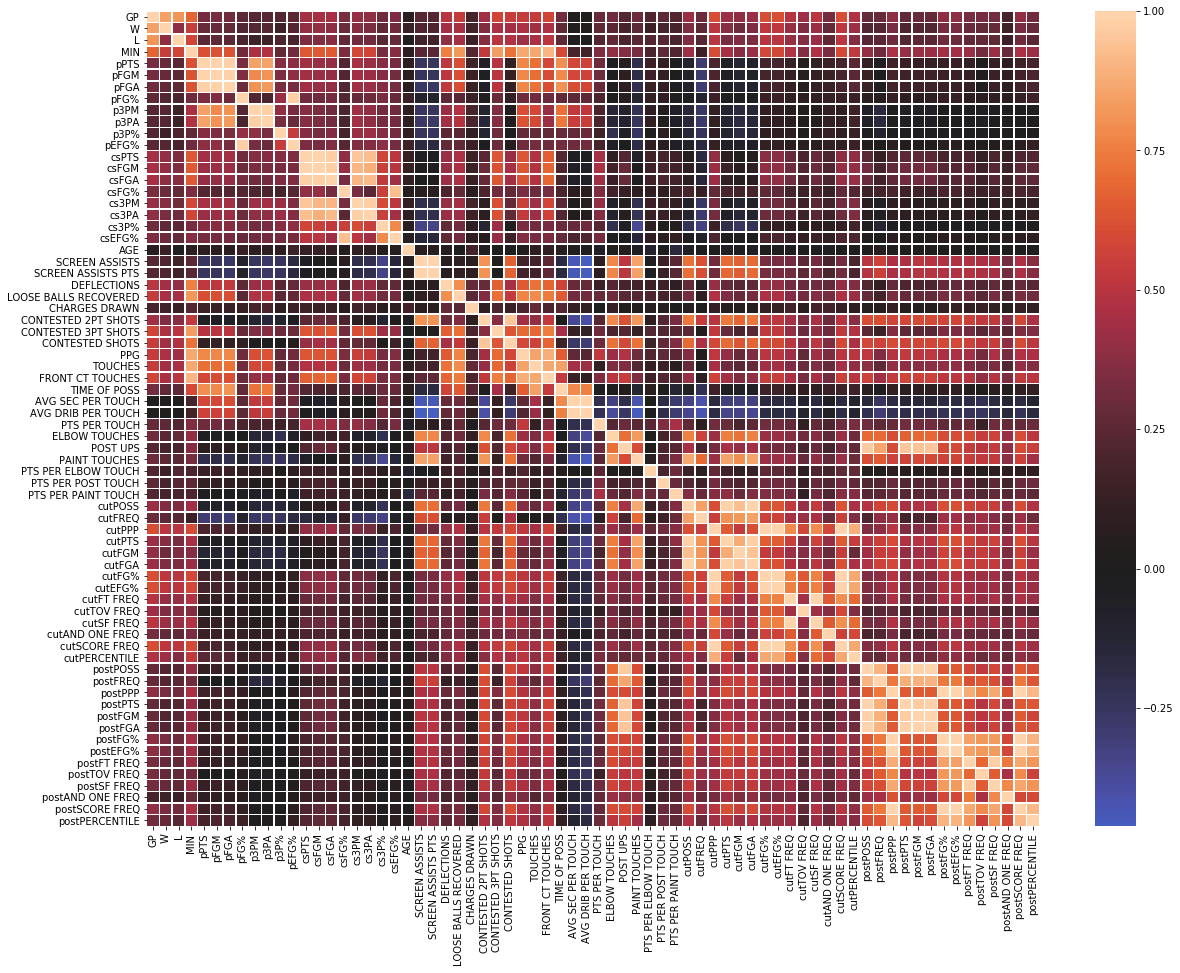

In [85]:
fig, ax = plt.subplots(figsize=(20,15))         # Sample figsize in inches
sns.heatmap(corr, linewidths=.5, ax=ax,center = False)

In [809]:
df_16.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 486 entries, 0 to 485
Data columns (total 76 columns):
PLAYER                         486 non-null object
TEAM                           486 non-null object
GP                             486 non-null int64
W                              486 non-null int64
L                              486 non-null int64
MIN                            486 non-null float64
pPTS                           486 non-null float64
pFGM                           486 non-null float64
pFGA                           486 non-null float64
pFG%                           486 non-null float64
p3PM                           486 non-null float64
p3PA                           486 non-null float64
p3P%                           486 non-null float64
pEFG%                          486 non-null float64
csPTS                          486 non-null float64
csFGM                          486 non-null float64
csFGA                          486 non-null float64
csFG%              

In [86]:
df_16 = df_16.drop(['W','L','OFF LOOSE BALLS RECOVERED','DEF LOOSE BALLS RECOVERED',
                     '% LOOSE BALLS RECOVERED OFF','% LOOSE BALLS RECOVERED DEF','csFGM',
                   'pFGM','cs3PM','p3PM','SCREEN ASSISTS PTS','CONTESTED SHOTS','cutFREQ','postFREQ',
                   'cutPPP','postFREQ','cutPPP','postPPP','cutFGM','postFGM','cutEFG%','postEFG%',
                   'cutPERCENTILE','postPERCENTILE'], axis=1)

In [87]:
print(df_16.loc[new_df['TEAM']=='BKN']['p3PA'].mean())
print(df_16.loc[new_df['TEAM']=='GSW']['p3PA'].mean())
df_16['TEAM'].unique()
fig, ax = plt.subplots(figsize=(20,10))  
sns.barplot(sorted(df_16['TEAM'].unique()),df_16.groupby('TEAM').mean()['cutPTS'],ax=ax)
#df_16.groupby('TEAM').mean()['cutPTS']


NameError: name 'new_df' is not defined

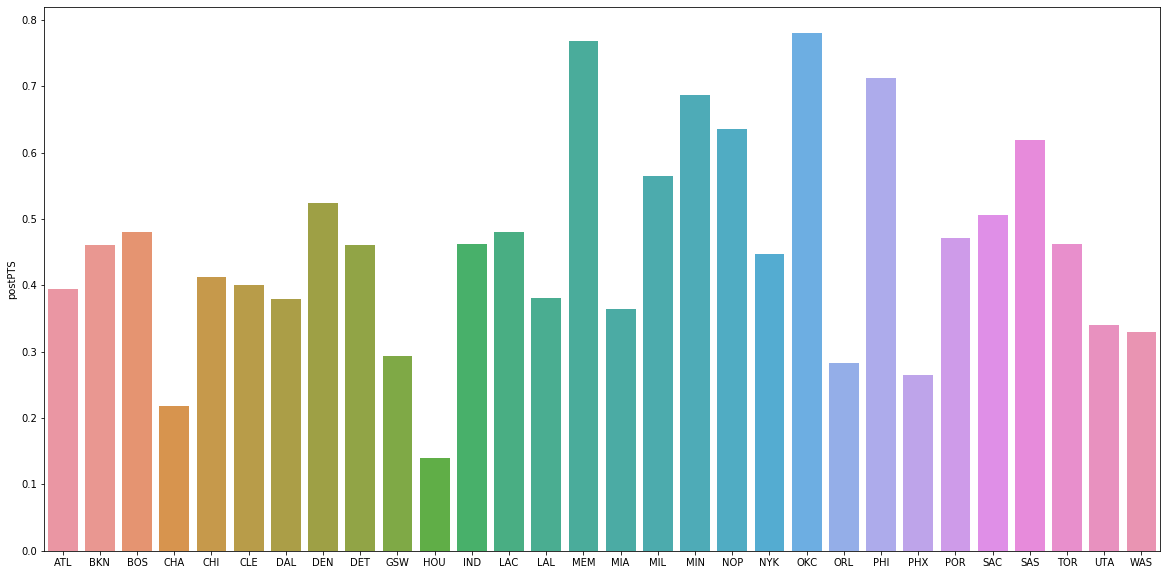

In [88]:
fig, ax = plt.subplots(figsize=(20,10))  
sns.barplot(sorted(df_16['TEAM'].unique()),df_16.groupby('TEAM').mean()['postPTS'],ax=ax)

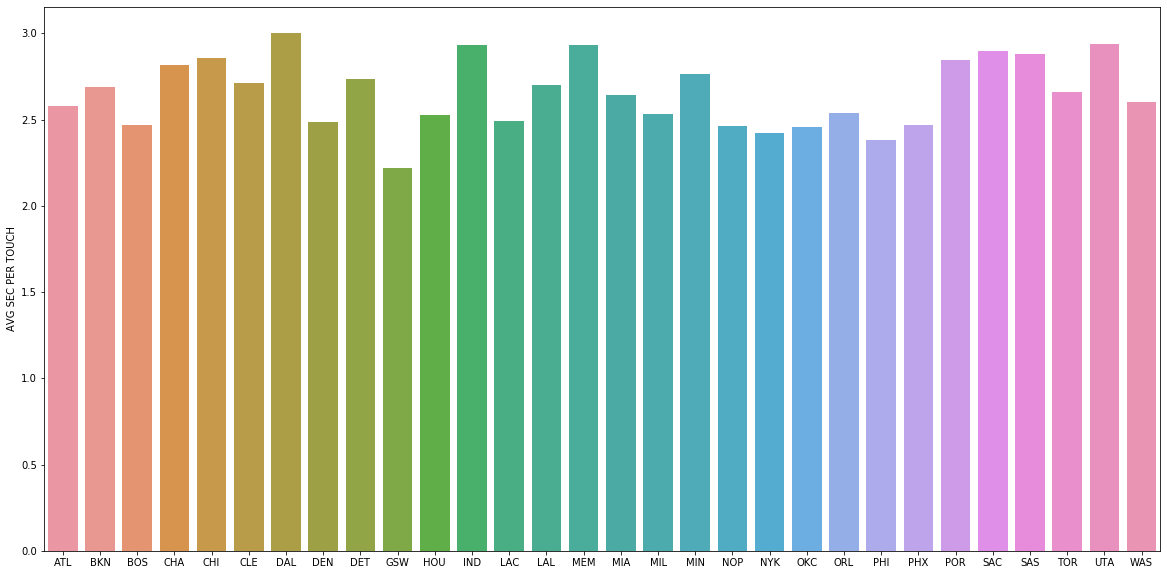

In [89]:
fig, ax = plt.subplots(figsize=(20,10))  
sns.barplot(sorted(df_16['TEAM'].unique()),df_16.groupby('TEAM').mean()['AVG SEC PER TOUCH'],ax=ax)

In [90]:
#np.mean(df_16.groupby('TEAM').mean()['AVG SEC PER TOUCH'])
x = df_16.groupby('TEAM').mean()['AVG SEC PER TOUCH']['GSW']
stats.weightstats.ztest(df_16.groupby('TEAM').mean()['AVG SEC PER TOUCH'])

AttributeError: 'list' object has no attribute 'weightstats'

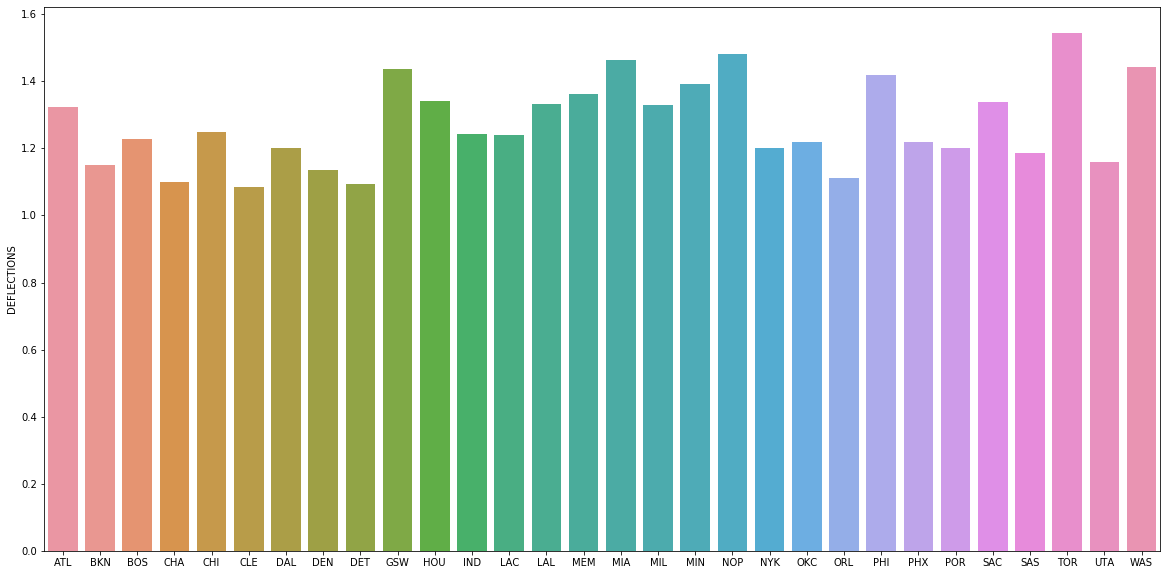

In [91]:
fig, ax = plt.subplots(figsize=(20,10))  
sns.barplot(sorted(df_16['TEAM'].unique()),df_16.groupby('TEAM').mean()['DEFLECTIONS'],ax=ax)

In [92]:
print(df_16.loc[new_df['TEAM']=='BKN']['csFG%'].mean())
print(df_16.loc[new_df['TEAM']=='GSW']['csFG%'].mean())
fig, ax = plt.subplots(figsize=(20,10))  
sns.barplot(sorted(df_16['TEAM'].unique()),df_16.groupby('TEAM').mean()['csFG%'],ax=ax)

NameError: name 'new_df' is not defined

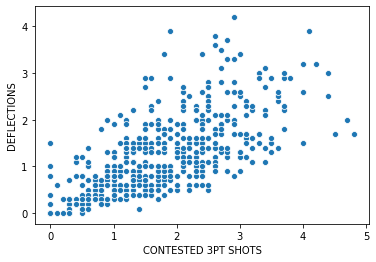

In [93]:
sns.scatterplot(df_16['CONTESTED 3PT SHOTS'],df_16['DEFLECTIONS'])


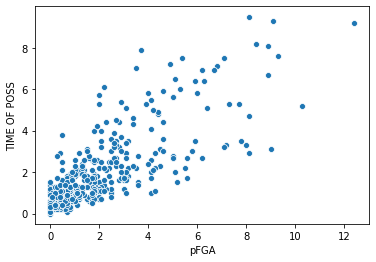

In [94]:
sns.scatterplot(df_16['pFGA'],df_16['TIME OF POSS'])

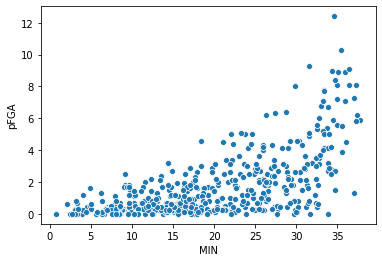

In [95]:
ax = sns.scatterplot(df_16['MIN'],df_16['pFGA'])
ax

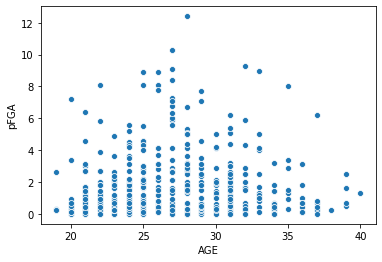

In [96]:
sns.scatterplot(df_16['AGE'],df_16['pFGA'])

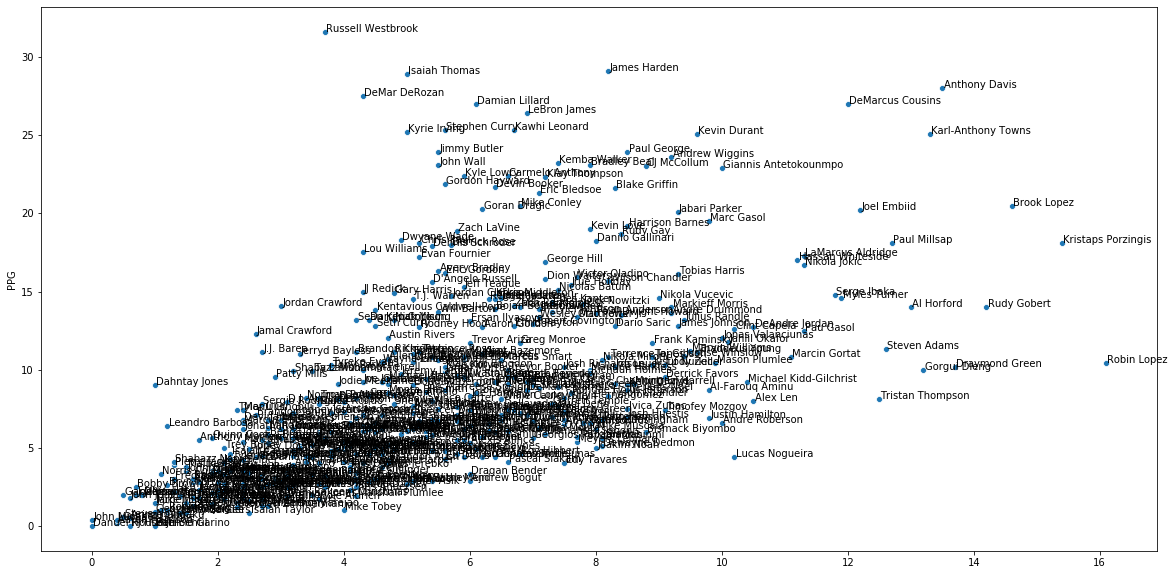

In [97]:
fig, ax = plt.subplots(figsize=(20,10)) 
ax = sns.scatterplot(df_16['CONTESTED 3PT SHOTS']+df_16['CONTESTED 2PT SHOTS'],df_16['PPG'])
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(df_16['CONTESTED 3PT SHOTS']+df_16['CONTESTED 2PT SHOTS'], df_16['PPG'], df_16['PLAYER'], plt.gca()) 

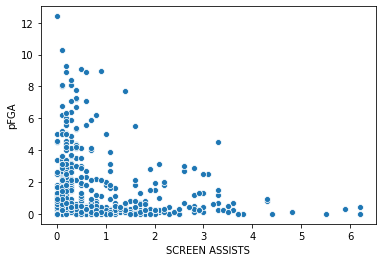

In [98]:
sns.scatterplot(df_16['SCREEN ASSISTS'],df_16['pFGA'])

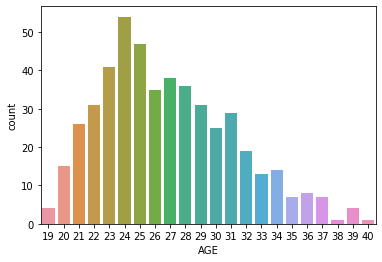

In [99]:
sns.countplot(df_16['AGE'])

AGE
19    2.175000
20    1.340000
21    1.942308
22    1.461290
23    1.582927
24    1.774074
25    2.210638
26    2.568571
27    2.350000
28    2.394444
29    2.283871
30    2.440000
31    2.603448
32    2.289474
33    2.130769
34    0.964286
35    1.700000
36    2.462500
37    1.700000
38    0.300000
39    3.525000
40    3.600000
Name: csFGA, dtype: float64

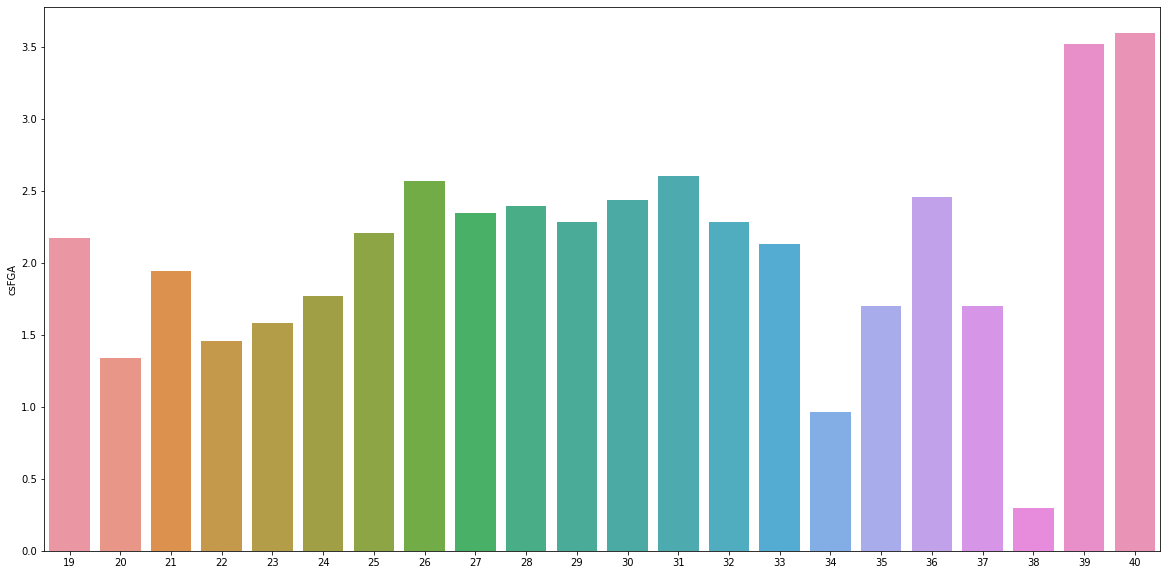

In [100]:
fig, ax = plt.subplots(figsize=(20,10))  
sns.barplot(sorted(df_16['AGE'].unique()),df_16.groupby('AGE').mean()['csFGA'],ax=ax)
df_16.groupby('AGE').mean()['csFGA']

AGE
19    2.175000
20    1.340000
21    1.942308
22    1.461290
23    1.582927
24    1.774074
25    2.210638
26    2.568571
27    2.350000
28    2.394444
29    2.283871
30    2.440000
31    2.603448
32    2.289474
33    2.130769
34    0.964286
35    1.700000
36    2.462500
37    1.700000
38    0.300000
39    3.525000
40    3.600000
Name: csFGA, dtype: float64

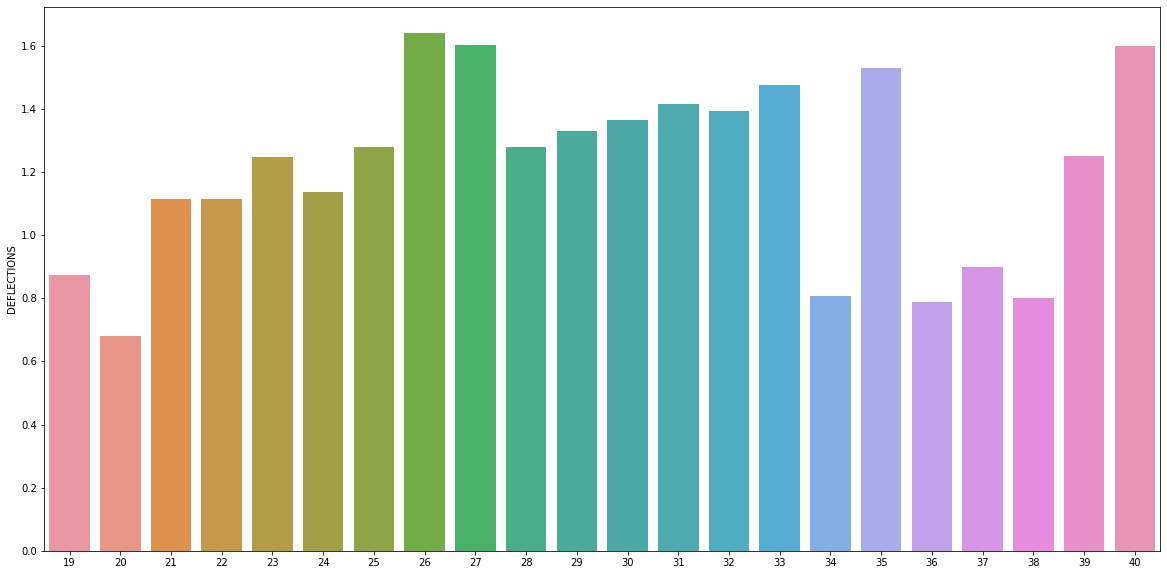

In [101]:
fig, ax = plt.subplots(figsize=(20,10))  
sns.barplot(sorted(df_16['AGE'].unique()),df_16.groupby('AGE').mean()['DEFLECTIONS'],ax=ax)
df_16.groupby('AGE').mean()['csFGA']

'1'

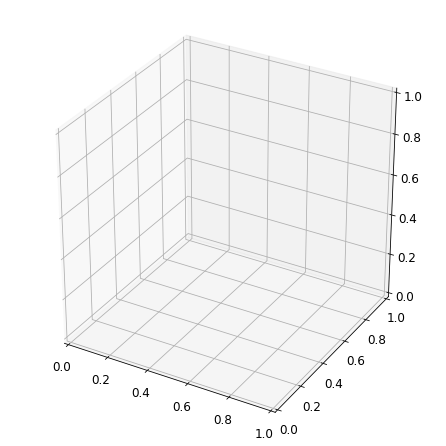

In [506]:
df_16.columns
x = df_16[['GP', 'MIN', 'pPTS', 'pFGA', 'pFG%', 'p3PA', 'p3P%',
       'pEFG%', 'csPTS', 'csFGA', 'csFG%', 'cs3PA', 'cs3P%', 'csEFG%', 'AGE',
       'SCREEN ASSISTS', 'DEFLECTIONS', 'LOOSE BALLS RECOVERED',
       'CHARGES DRAWN', 'CONTESTED 2PT SHOTS', 'CONTESTED 3PT SHOTS', 'PPG',
       'TOUCHES', 'FRONT CT TOUCHES', 'TIME OF POSS', 'AVG SEC PER TOUCH',
       'AVG DRIB PER TOUCH', 'PTS PER TOUCH', 'ELBOW TOUCHES', 'POST UPS',
       'PAINT TOUCHES', 'PTS PER ELBOW TOUCH', 'PTS PER POST TOUCH',
       'PTS PER PAINT TOUCH', 'cutPOSS', 'cutPTS', 'cutFGA', 'cutFG%',
       'cutFT FREQ', 'cutTOV FREQ', 'cutSF FREQ', 'cutAND ONE FREQ',
       'cutSCORE FREQ', 'postPOSS', 'postPTS', 'postFGA', 'postFG%',
       'postFT FREQ', 'postTOV FREQ', 'postSF FREQ', 'postAND ONE FREQ',
       'postSCORE FREQ','cluster']]

x = StandardScaler().fit_transform(x)
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc 1', 'pc 2','pc 3'])


principalDf
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
cdict = {0:'red',1:'green',2:'black',3:'grey',4:'blue',
              5:'pink',6:'orange',7:'purple',8:'yellow',9:'brown'}
labl = {0:'0',1:'1',2:'2',3:'3',4:'4',5:'5',6:"6",7:"7",8:'8',9:'9'}
#sns.scatterplot(principalDf['pc 1'],principalDf['pc 2'],principalDf['pc 3'], ax = ax)

#pca.explained_variance_ratio_
Xax = principalComponents[:,0]
Yax = principalComponents[:,1]
Zax = principalComponents[:,2]
labels = df_16.cluster

for l in np.unique(labels):
    ix=np.where(labels==0)
    ax.scatter(Xax[ix],Yax[ix],Zax,c=cdict[0],s=40,
           label=labl[0])
    #ix=np.where(labels==l)
    #ax.scatter(Xax[ix],Yax[ix],Zax,c=cdict[l],s=40,
     #      label=labl[l])
    #ix=np.where(labels==2)
    #ax.scatter(Xax[ix],Yax[ix],Zax,c=cdict[2],s=40,
     #      label=labl[2])
    #ix=np.where(labels==3)
    #ax.scatter(Xax[ix],Yax[ix],Zax,c=cdict[3],s=40,
     #      label=labl[3])
    #ix=np.where(labels==4)
    #ax.scatter(Xax[ix],Yax[ix],Zax,c=cdict[4],s=40,
     #      label=labl[4])
    #ix=np.where(labels==5)
    #ax.scatter(Xax[ix],Yax[ix],Zax,c=cdict[5],s=40,
     #      label=labl[5])
    #ix=np.where(labels==6)
    #ax.scatter(Xax[ix],Yax[ix],Zax,c=cdict[6],s=40,
     #      label=labl[6])
    #ix=np.where(labels==7)
    #ax.scatter(Xax[ix],Yax[ix],Zax,c=cdict[7],s=40,
     #      label=labl[7])
    #ix=np.where(labels==8)
    #ax.scatter(Xax[ix],Yax[ix],Zax,c=cdict[8],s=40,
     #      label=labl[8])
    #ix=np.where(labels==9)
    #ax.scatter(Xax[ix],Yax[ix],Zax,c=cdict[9],s=40,
     #      label=labl[9])

In [453]:
x = df_16[['GP', 'MIN', 'pPTS', 'pFGA', 'pFG%', 'p3PA', 'p3P%',
       'pEFG%', 'csPTS', 'csFGA', 'csFG%', 'cs3PA', 'cs3P%', 'csEFG%', 'AGE',
       'SCREEN ASSISTS', 'DEFLECTIONS', 'LOOSE BALLS RECOVERED',
       'CHARGES DRAWN', 'CONTESTED 2PT SHOTS', 'CONTESTED 3PT SHOTS', 'PPG',
       'TOUCHES', 'FRONT CT TOUCHES', 'TIME OF POSS', 'AVG SEC PER TOUCH',
       'AVG DRIB PER TOUCH', 'PTS PER TOUCH', 'ELBOW TOUCHES', 'POST UPS',
       'PAINT TOUCHES', 'PTS PER ELBOW TOUCH', 'PTS PER POST TOUCH',
       'PTS PER PAINT TOUCH', 'cutPOSS', 'cutPTS', 'cutFGA', 'cutFG%',
       'cutFT FREQ', 'cutTOV FREQ', 'cutSF FREQ', 'cutAND ONE FREQ',
       'cutSCORE FREQ', 'postPOSS', 'postPTS', 'postFGA', 'postFG%',
       'postFT FREQ', 'postTOV FREQ', 'postSF FREQ', 'postAND ONE FREQ',
       'postSCORE FREQ']]

In [454]:



kmeans_model = KMeans(n_clusters=10, random_state=1)
kmeans_model.fit(x)
kmeans_model.labels_

LeBron = x.loc[df_16['PLAYER'] == 'LeBron James',: ]
Durant = x.loc[df_16['PLAYER'] == 'Kevin Durant',: ]

Lebron_list = LeBron.values.tolist()
Durant_list = Durant.values.tolist()

LeBron_Cluster_Label = kmeans_model.predict(Lebron_list)
Durant_Cluster_Label = kmeans_model.predict(Durant_list)

print(LeBron_Cluster_Label)
print(Durant_Cluster_Label)

[1]
[1]


In [455]:
group0 = []
group1 = []
group2 = []
group3 = []
group4 = []
group5 = []
group6 = []
group7 = []
for player in df_16['PLAYER']:
    player_stats = x.loc[df_16['PLAYER'] == player,: ]
    player_stats_list = player_stats.values.tolist()
    player_cluster_label = kmeans_model.predict(player_stats_list)
    label = list(player_cluster_label)
   
    if label == [0]:
        group0.append(player)
    if label == [1]:
        group1.append(player)
    if label == [2]:
        group2.append(player)
    if label == [3]:
        group3.append(player)
    if label == [4]:
        group4.append(player)
    if label == [5]:
        group5.append(player)
    if label == [6]:
        group6.append(player)
    if label == [7]:
        group7.append(player)
df_16['cluster'] = kmeans_model.labels_

In [122]:
print(group0)

['Andre Roberson', 'Anthony Bennett', 'Briante Weber', 'Dante Cunningham', 'Dante Exum', 'David Nwaba', 'Derrick Jones Jr.', 'Dwight Powell', 'Ed Davis', 'Jakob Poeltl', 'Jarell Martin', 'Jerami Grant', 'Joakim Noah', 'Joffrey Lauvergne', 'Juancho Hernangomez', 'Justin Anderson', 'KJ McDaniels', 'Kris Humphries', 'Lavoy Allen', 'Lucas Nogueira', 'Maurice Ndour', 'Michael Carter-Williams', 'Mike Muscala', 'Miles Plumlee', 'Nerlens Noel', 'Okaro White', 'Omri Casspi', 'Reggie Bullock', 'Ron Baker', 'Salah Mejri', 'Semaj Christon', 'Shawn Long', 'Thomas Robinson', 'Timothe Luwawu-Cabarrot', 'Tomas Satoransky', 'Tristan Thompson', 'Tyler Zeller', 'Tyson Chandler', 'Wesley Johnson']


In [115]:
print(df_16[df_16['PLAYER'].isin(group7)]['PPG'].mean(),df_16[df_16['PLAYER'].isin(group4)]['PPG'].mean())

5.325806451612904 15.40978260869565


In [116]:
group_list = [group0,group1,group2,group3,group4,group5,group6,group7]
for i in group_list:
    print((df_16[df_16['PLAYER'].isin(i)]['CONTESTED 2PT SHOTS']+df_16[df_16['PLAYER'].isin(i)]['CONTESTED 3PT SHOTS']).mean())
    

7.643283582089553
2.6634615384615383
5.1925233644859805
3.983333333333333
7.9402173913043494
2.174285714285714
3.0523809523809526
5.561290322580645


In [539]:
#save datasets
export_nba18 = df_18.to_csv('nba18_advanced')
#export_nba18_standard = df_standard18.to_csv('nba18_standard')

In [533]:
df_18 = df_18.loc[df_18['MIN']>10]
x18 = df_18[['GP', 'MIN', 'pPTS', 'pFGA', 'pFG%', 'p3PA', 'p3P%',
       'pEFG%', 'csPTS', 'csFGA', 'csFG%', 'cs3PA', 'cs3P%', 'csEFG%', 'AGE',
       'SCREEN ASSISTS', 'DEFLECTIONS', 'LOOSE BALLS RECOVERED',
       'CHARGES DRAWN', 'CONTESTED 2PT SHOTS', 'CONTESTED 3PT SHOTS', 'PPG',
       'TOUCHES', 'FRONT CT TOUCHES', 'TIME OF POSS', 'AVG SEC PER TOUCH',
       'AVG DRIB PER TOUCH', 'PTS PER TOUCH', 'ELBOW TOUCHES', 'POST UPS',
       'PAINT TOUCHES', 'PTS PER ELBOW TOUCH', 'PTS PER POST TOUCH',
       'PTS PER PAINT TOUCH', 'cutPOSS', 'cutPTS', 'cutFGA', 'cutFG%',
       'cutFT FREQ', 'cutTOV FREQ', 'cutSF FREQ', 'cutAND ONE FREQ',
       'cutSCORE FREQ', 'postPOSS', 'postPTS', 'postFGA', 'postFG%',
       'postFT FREQ', 'postTOV FREQ', 'postSF FREQ', 'postAND ONE FREQ',
       'postSCORE FREQ']]



kmeans_model = KMeans(n_clusters=9, random_state=1)
kmeans_model.fit(x18)

group0_18 = []
group1_18 = []
group2_18 = []
group3_18 = []
group4_18 = []
group5_18 = []
group6_18 = []
group7_18 = []
group8_18 = []

for player in df_18['PLAYER']:
    player_stats = x18.loc[df_18['PLAYER'] == player,: ]
    player_stats_list = player_stats.values.tolist()
    player_cluster_label = kmeans_model.predict(player_stats_list)
    label = list(player_cluster_label)
   
    if label == [0]:
        group0_18.append(player)
    if label == [1]:
        group1_18.append(player)
    if label == [2]:
        group2_18.append(player)
    if label == [3]:
        group3_18.append(player)
    if label == [4]:
        group4_18.append(player)
    if label == [5]:
        group5_18.append(player)
    if label == [6]:
        group6_18.append(player)
    if label == [7]:
        group7_18.append(player)
    if label == [8]:
        group8_18.append(player)
    
group_list18 = [group0_18,group1_18,group2_18,group3_18,group4_18,group5_18,group6_18,group7_18,group8_18]
df_18['cluster'] = kmeans_model.labels_

In [175]:
#agglomerative clustering
x18 = df_18[['GP', 'MIN', 'pPTS', 'pFGA', 'pFG%', 'p3PA', 'p3P%',
       'pEFG%', 'csPTS', 'csFGA', 'csFG%', 'cs3PA', 'cs3P%', 'csEFG%', 'AGE',
       'SCREEN ASSISTS', 'DEFLECTIONS', 'LOOSE BALLS RECOVERED',
       'CHARGES DRAWN', 'CONTESTED 2PT SHOTS', 'CONTESTED 3PT SHOTS', 'PPG',
       'TOUCHES', 'FRONT CT TOUCHES', 'TIME OF POSS', 'AVG SEC PER TOUCH',
       'AVG DRIB PER TOUCH', 'PTS PER TOUCH', 'ELBOW TOUCHES', 'POST UPS',
       'PAINT TOUCHES', 'PTS PER ELBOW TOUCH', 'PTS PER POST TOUCH',
       'PTS PER PAINT TOUCH', 'cutPOSS', 'cutPTS', 'cutFGA', 'cutFG%',
       'cutFT FREQ', 'cutTOV FREQ', 'cutSF FREQ', 'cutAND ONE FREQ',
       'cutSCORE FREQ', 'postPOSS', 'postPTS', 'postFGA', 'postFG%',
       'postFT FREQ', 'postTOV FREQ', 'postSF FREQ', 'postAND ONE FREQ',
       'postSCORE FREQ']]
agglom_model = AgglomerativeClustering(n_clusters=10)
ag_labels = agglom_model.fit_predict(x18)
df_18['ag_labels'] = ag_labels
df_18.loc[df_18['ag_labels']==0]

,PLAYER,TEAM,GP,W,L,MIN,pPTS,pFGM,pFGA,pFG%,...,postFGA,postFG%,postEFG%,postFT FREQ,postTOV FREQ,postSF FREQ,postAND ONE FREQ,postSCORE FREQ,postPERCENTILE,ag_labels
0,Aaron Gordon,ORL,78,40,38,33.8,2.8,1.2,3.4,36.2,...,1.8,42.0,42.0,0.145,0.092,0.127,0.035,0.428,29.9,0
3,Al Horford,BOS,68,41,27,29.0,0.6,0.3,0.7,45.8,...,1.7,53.0,53.0,0.092,0.127,0.099,0.049,0.479,64.2,0
9,Alex Len,ATL,77,28,49,20.1,0.1,0.0,0.1,33.3,...,0.8,58.3,58.3,0.222,0.178,0.200,0.067,0.544,87.1,0
22,Andrew Wiggins,MIN,73,31,42,34.8,4.4,2.0,6.2,32.5,...,1.2,39.6,39.6,0.093,0.136,0.059,0.000,0.390,19.1,0
26,Anthony Davis,NOP,56,25,31,33.0,2.7,1.4,4.1,33.2,...,3.3,43.2,43.2,0.214,0.058,0.181,0.025,0.506,61.8,0
33,Bam Adebayo,MIA,82,39,43,23.3,0.4,0.2,0.4,48.6,...,0.4,45.7,45.7,0.157,0.176,0.137,0.020,0.431,35.8,0
38,Blake Griffin,DET,75,39,36,35.0,4.9,1.7,5.2,33.2,...,4.4,48.6,48.6,0.199,0.149,0.159,0.037,0.482,49.5,0
40,Bobby Portis,WAS,50,14,36,26.0,1.0,0.5,1.3,36.4,...,1.5,41.5,41.5,0.093,0.185,0.093,0.037,0.370,20.6,0
41,Bogdan Bogdanovic,SAC,70,32,38,27.8,3.9,1.6,4.6,35.8,...,0.4,51.7,51.7,0.231,0.103,0.205,0.077,0.538,81.4,0
42,Bojan Bogdanovic,IND,81,47,34,31.8,3.0,1.3,3.3,38.7,...,0.6,38.0,38.0,0.177,0.048,0.161,0.032,0.435,30.4,0


In [139]:
driver.get('https://stats.nba.com/players/traditional/?sort=PTS&dir=-1&Season=2018-19&SeasonType=Regular%20Season')
obj = Select(driver.find_element_by_xpath('/html/body/main/div[2]/div/div[2]/div/div/nba-stat-table/div[1]/div/div/select'))
obj.select_by_index(0)
standard_stats18 = driver.find_elements_by_xpath('//tr[@data-ng-repeat="(i, row) in page track by ::row.$hash"]')

stats_list_standard18 = []
for i in range(530):
    stats_list_standard18.append(standard_stats18[i].text)
stats_list_standard18[0]

def clean_standard_data(stats_list):
    cleaned = []
    for i in stats_list:
        x = i.split('\n')[1:]
        y = x[1].split(" ")
        empty = [x[0]]
        for j in range(len(y)):
            empty.append(y[j])
        cleaned.append(empty)
    return cleaned


standard_18 = clean_standard_data(stats_list_standard18)

columns_standard = driver.find_elements_by_tag_name('th')
cols_standard = []
for i in range(len(columns_standard)):
    cols_standard.append(columns_standard[i].text)


cols_standard[1:30]
df_standard18 = make_df(cols_standard[1:30],standard_18)
df_standard18.head()

,PLAYER,TEAM,AGE,GP,W,L,MIN,PTS,FGM,FGA,...,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
0,James Harden,HOU,29,78,51,27,36.8,36.1,10.8,24.5,...,6.6,7.5,5.0,2.0,0.7,3.1,58.7,34,7,4.6
1,Paul George,OKC,29,77,46,31,36.9,28.0,9.2,21.0,...,8.2,4.1,2.7,2.2,0.4,2.8,49.3,24,1,6.4
2,Giannis Antetokounmpo,MIL,24,72,56,16,32.8,27.7,10.0,17.3,...,12.5,5.9,3.7,1.3,1.5,3.2,56.2,54,5,9.1
3,Joel Embiid,PHI,25,64,43,21,33.7,27.5,9.1,18.7,...,13.6,3.7,3.5,0.7,1.9,3.3,53.7,58,2,5.8
4,LeBron James,LAL,34,55,28,27,35.2,27.4,10.1,19.9,...,8.5,8.3,3.6,1.3,0.6,1.7,52.0,32,8,2.1


In [292]:

df_standard18 = clean_df(df_standard18)
df_standard18[df_standard18['PLAYER'].isin(group0_18)]['PTS'].mean()
five_stats = ['PTS','AST','REB','STL','BLK']

KeyError: 'csFG%'

In [312]:
pts_list = []
for group in group_list18:
    pts_list.append(df_standard18[df_standard18['PLAYER'].isin(group)]['PTS'].mean())

ast_list = []
for group in group_list18:
    ast_list.append(df_standard18[df_standard18['PLAYER'].isin(group)]['AST'].mean())
    
reb_list = []
for group in group_list18:
    reb_list.append(df_standard18[df_standard18['PLAYER'].isin(group)]['REB'].mean())

stl_list = []
for group in group_list18:
    stl_list.append(df_standard18[df_standard18['PLAYER'].isin(group)]['STL'].mean())
    
blk_list = []
for group in group_list18:
    blk_list.append(df_standard18[df_standard18['PLAYER'].isin(group)]['BLK'].mean())

made3_list = []
for group in group_list18:
    made3_list.append(df_standard18[df_standard18['PLAYER'].isin(group)]['3PM'].mean())

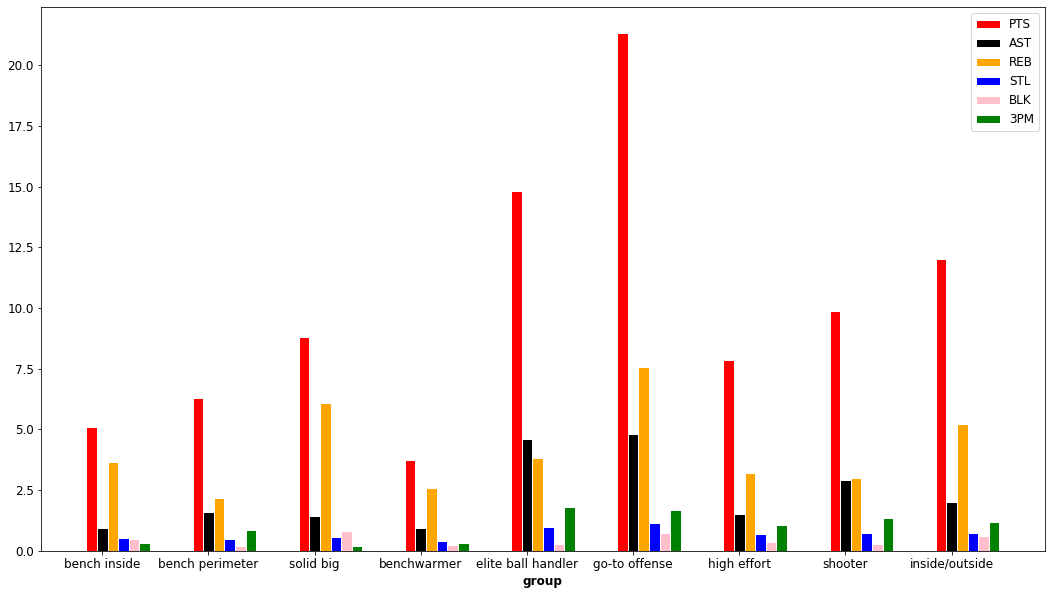

In [530]:
barWidth = 0.1
 
# set height of bar
bars_pts = pts_list
bars_ast = ast_list
bars_reb = reb_list
bars_stl = stl_list
bars_blk = blk_list
bars_3pt = made3_list
# Set position of bar on X axis
r1 = np.arange(len(bars_pts))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
# Make the plot
fig = plt.figure(figsize=(18,10))
plt.bar(r1, bars_pts, color='red', width=barWidth, edgecolor='white', label='PTS')
plt.bar(r2, bars_ast, color='black', width=barWidth, edgecolor='white', label='AST')
plt.bar(r3, bars_reb, color='orange', width=barWidth, edgecolor='white', label='REB')
plt.bar(r4, bars_stl, color='blue', width=barWidth, edgecolor='white', label='STL')
plt.bar(r5, bars_blk, color='pink', width=barWidth, edgecolor='white', label='BLK')
plt.bar(r6, bars_3pt, color='green', width=barWidth, edgecolor='white', label='3PM')
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars_pts))], ['bench inside', 'bench perimeter', 'solid big', 
                                                          'benchwarmer', 'elite ball handler',
                                                          'go-to offense','high effort','shooter',
                                                          'inside/outside'])

 
# Create legend & Show graphic

plt.legend()
plt.show()


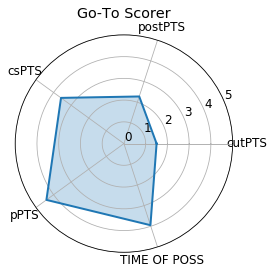

In [519]:
#radar plot
labels = ['cutPTS','postPTS','csPTS','pPTS','TIME OF POSS']
markers = [0,1,2,3,4,5]
str_markers = ['0','1','2','3','4','5']

def make_radar_chart(name, stats, attribute_labels = labels, plot_markers = markers, plot_str_markers = str_markers):

    labels = np.array(attribute_labels)

    angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
    stats = np.concatenate((stats,[stats[0]]))
    angles = np.concatenate((angles,[angles[0]]))
    
    plt.rcParams.update({'font.size':12})
    fig= plt.figure()
    ax = fig.add_subplot(111, polar=True)
    ax.plot(angles, stats, linewidth=2)
    ax.fill(angles, stats, alpha=0.25)
    ax.set_thetagrids(angles * 180/np.pi, labels)
    plt.yticks(markers)
    ax.set_title(name)
    ax.grid(True)  

    return plt.show()

go_to_stats = []
for i in labels:
    go_to_stats.append(df_18.loc[df_18['cluster']=='go-to scorer'][i].mean())

solid_big_stats = []
for i in labels:
    solid_big_stats.append(df_18.loc[df_18['cluster']=='solid big'][i].mean())
    
elite_ballhandler_stats = []
for i in labels:
    elite_ballhandler_stats.append(df_18.loc[df_18['cluster']=='elite ballhandler'][i].mean())

make_radar_chart("Go-To Scorer",go_to_stats)

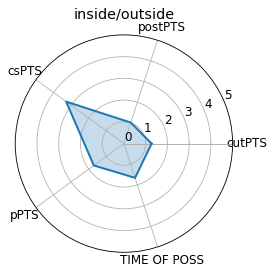

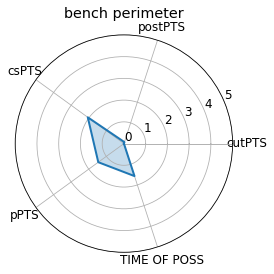

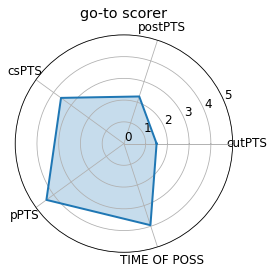

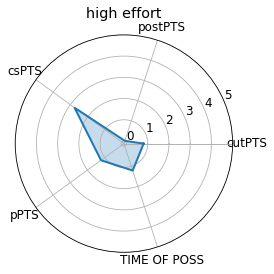

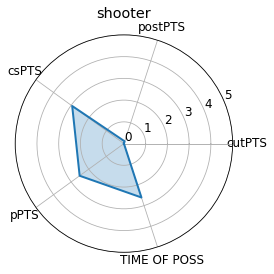

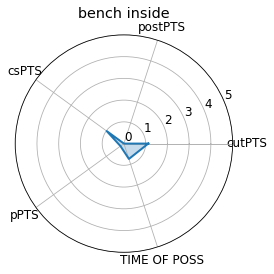

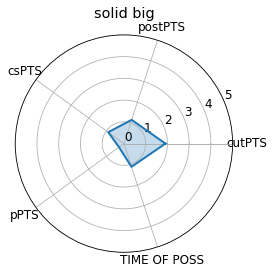

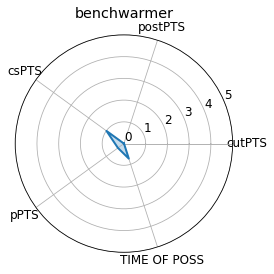

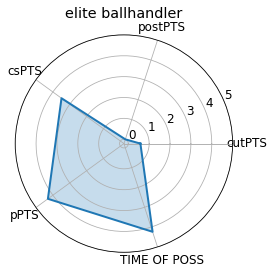

In [541]:
clusters = list(df_18.cluster.unique())
for cluster in clusters:
    stats_list = []
    for label in labels:
        stats_list.append(df_18.loc[df_18['cluster']==cluster][label].mean())
    make_radar_chart(cluster,stats_list)
    print('\n')

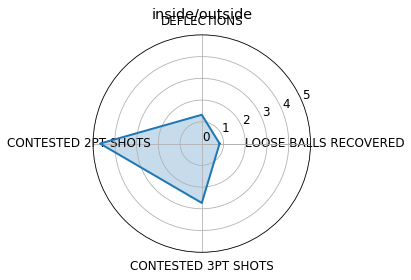

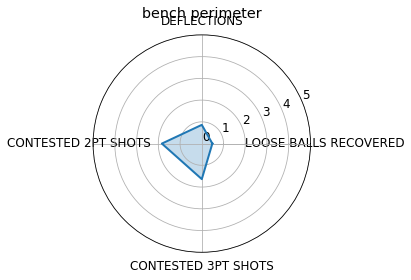

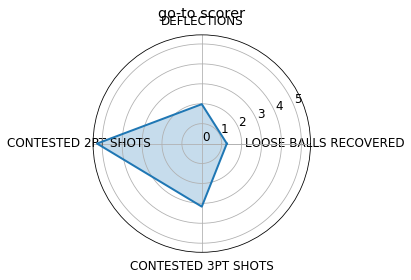

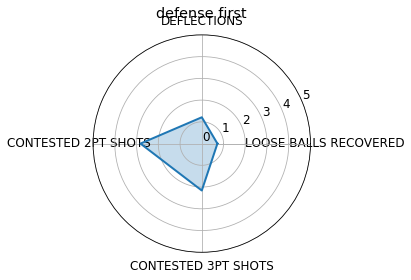

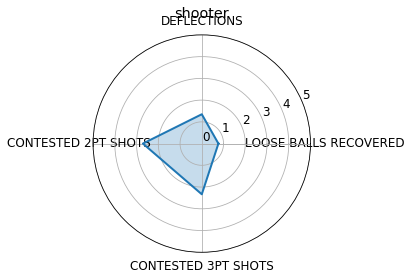

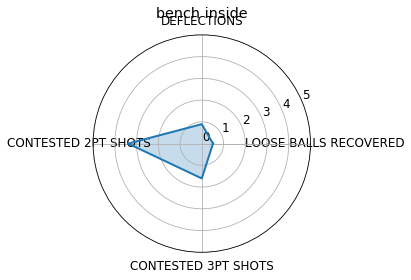

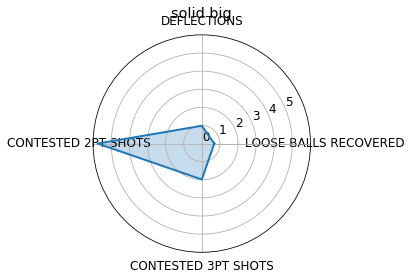

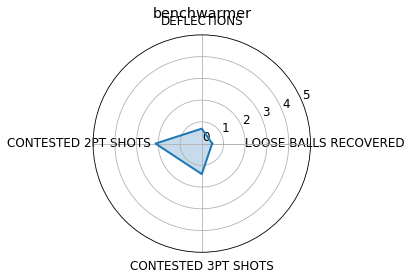

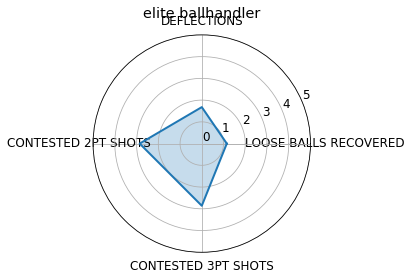

In [523]:
labels_def = ['LOOSE BALLS RECOVERED','DEFLECTIONS','CONTESTED 2PT SHOTS','CONTESTED 3PT SHOTS']
markers = [0,1,2,3,4,5]
str_markers = ['0','1','2','3','4','5']

for cluster in clusters:
    stats_list = []
    for label in labels_def:
        stats_list.append(df_18.loc[df_18['cluster']==cluster][label].mean())
    make_radar_chart(cluster,stats_list,labels_def)
    print('\n')

In [318]:
for group in group_list18:
    print(df_18[df_18['PLAYER'].isin(group)]['pEFG%'].mean())

13.234615384615388
42.99591836734693
28.071698113207542
15.42
45.35249999999999
42.04324324324324
43.26774193548387
41.61702127659574
41.375384615384604


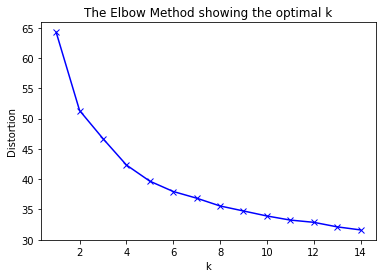

In [179]:
distortions = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(x)
    kmeanModel.fit(x)
    distortions.append(sum(np.min(cdist(x, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / x.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

 


In [548]:
for i in group_list18:
    print(i)
    print('\n')


['Alex Poythress', 'Andrew Bogut', 'Chandler Hutchison', 'Corey Brewer', 'Damian Jones', 'Dante Cunningham', "De'Anthony Melton", 'Derrick Jones Jr.', 'Devin Robinson', 'Donte DiVincenzo', 'Ed Davis', 'Frank Mason', 'Hamidou Diallo', 'Ian Mahinmi', 'Jaron Blossomgame', 'Jarrett Allen', 'Johnathan Williams', 'Jonah Bolden', 'Keita Bates-Diop', 'Khem Birch', 'Omari Spellman', 'Omri Casspi', 'Ray Spalding', 'Semi Ojeleye', 'Timothe Luwawu-Cabarrot', 'Tyson Chandler']


['Aaron Holiday', 'Abdel Nader', 'Alex Abrines', 'Brandon Knight', 'Brandon Sampson', 'CJ Miles', 'Cameron Payne', 'Cameron Reynolds', 'Carmelo Anthony', 'Chandler Parsons', 'Courtney Lee', 'Damion Lee', 'Dante Exum', 'Danuel House Jr.', 'Daryl Macon', "Devonte' Graham", 'Duncan Robinson', 'Dwayne Bacon', 'Frank Ntilikina', 'Gary Clark', 'Grayson Allen', 'Henry Ellenson', 'Isaiah Briscoe', 'Isaiah Canaan', 'Isaiah Thomas', 'JR Smith', 'JaKarr Sampson', 'Jaylen Adams', 'Jerryd Bayless', 'Jevon Carter', 'Jodie Meeks', 'John J

In [534]:
bench_inside = group0_18
bench_perimeter = group1_18
solid_big = group2_18
benchwarmer = group3_18
elite_ballhandler = group4_18
go_to_scorer = group5_18
defense_first = group6_18
shooter = group7_18
inside_outside = group8_18
#change cluster label names
df_18['cluster'] = df_18['cluster'].map({0:'bench inside', 1:'bench perimeter', 2:'solid big', 3:'benchwarmer',
                                        4:'elite ballhandler', 5:'go-to scorer', 6:'high effort', 7:'shooter',
                                        8:'inside/outside'})


In [419]:
def get_cluster(player):
    return df_18.loc[df_18['PLAYER']==player]['cluster']

get_cluster("Buddy Hield")

54    elite ballhandler
Name: cluster, dtype: object

In [423]:
df_18.loc[df_18['TEAM']=='GSW'][['PLAYER','cluster']]
#for i in df_18.loc[df_18['TEAM']=='GSW']:
    #print(i)

,PLAYER,cluster
11,Alfonzo McKinnie,defense first
18,Andre Iguodala,defense first
20,Andrew Bogut,bench inside
86,Damian Jones,bench inside
88,Damion Lee,bench perimeter
109,DeMarcus Cousins,inside/outside
140,Draymond Green,go-to scorer
268,Jonas Jerebko,inside/outside
272,Jordan Bell,solid big
304,Kevin Durant,go-to scorer


(<matplotlib.axes._subplots.AxesSubplot at 0x1a2b17dcf8>,
             PLAYER            cluster
 93     Danny Green     inside/outside
 168  Fred VanVleet  elite ballhandler
 246     Jeremy Lin            shooter
 254    Jodie Meeks    bench perimeter
 295  Kawhi Leonard       go-to scorer
 320     Kyle Lowry  elite ballhandler
 346     Marc Gasol       go-to scorer
 392  Norman Powell        high effort
 393     OG Anunoby          solid big
 400  Pascal Siakam       go-to scorer
 403  Patrick McCaw        benchwarmer
 441    Serge Ibaka     inside/outside)

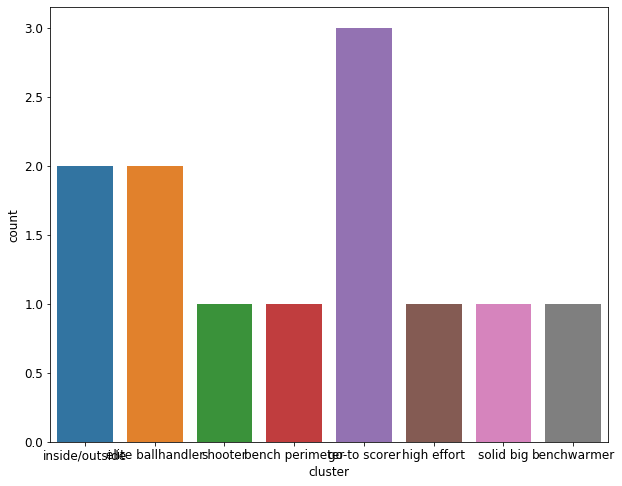

In [538]:


def get_team_build(team):
    fig = plt.figure(figsize=(10,8))
    barplot = sns.countplot(df_18.loc[df_18['TEAM']==team]['cluster'])
    players = df_18.loc[df_18['TEAM']==team][['PLAYER','cluster']]
    return barplot, players

get_team_build('TOR')

['Al-Farouq Aminu', 'Avery Bradley', 'Buddy Hield', 'CJ McCollum', 'Caris LeVert', 'Collin Sexton', 'Cory Joseph', 'D.J. Augustin', 'Damian Lillard', 'Damyean Dotson', 'Darren Collison', "De'Aaron Fox", 'DeMarre Carroll', 'Dennis Schroder', 'Derrick Rose', 'Derrick White', 'Donovan Mitchell', "E'Twaun Moore", 'Elfrid Payton', 'Eric Gordon', 'Evan Fournier', 'Fred VanVleet', 'Gary Harris', 'Goran Dragic', 'JJ Redick', 'Jae Crowder', 'Jamal Murray', 'Jarrett Allen', 'Jeremy Lamb', 'Joe Harris', 'Josh Hart', 'Justin Holiday', 'Kelly Oubre Jr.', 'Kemba Walker', 'Kevin Huerter', 'Kevin Knox II', 'Kyle Anderson', 'Kyle Lowry', 'Lonzo Ball', 'Lou Williams', 'Malcolm Brogdon', 'Mikal Bridges', 'Mike Conley', 'Nicolas Batum', 'P.J. Tucker', 'Patrick Beverley', 'Rajon Rondo', 'Reggie Bullock', 'Reggie Jackson', 'Ricky Rubio', 'Robert Covington', 'Shai Gilgeous-Alexander', 'Stephen Curry', 'Taurean Prince', 'Terrance Ferguson', 'Terrence Ross', 'Trae Young', 'Trevor Ariza', 'Wesley Matthews', 'Wi

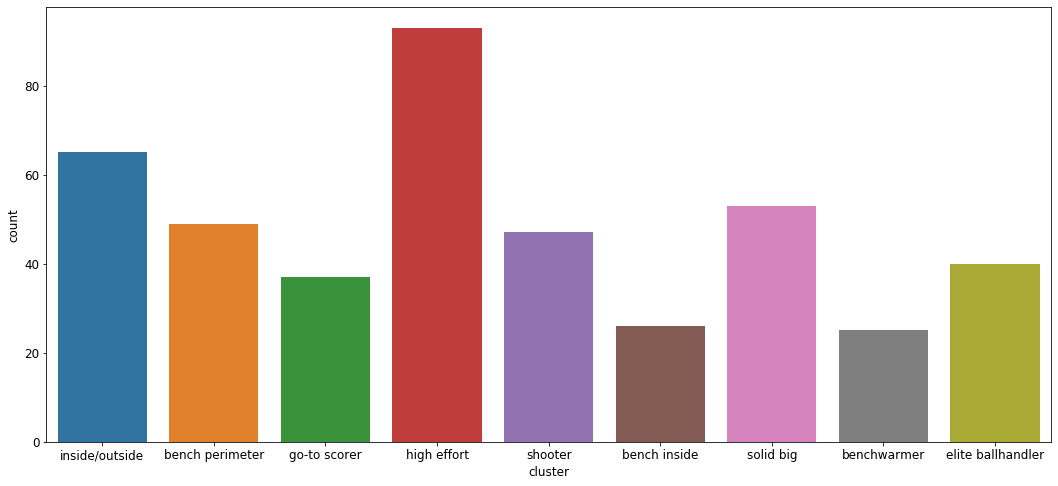

In [547]:
fig = plt.figure(figsize=(18,8))
sns.countplot(df_18['cluster'])

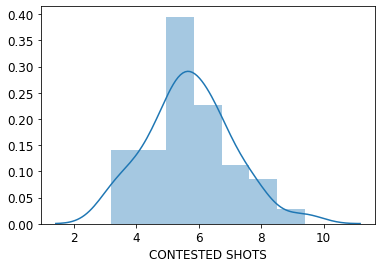

In [514]:
sns.distplot(df_18.loc[df_18['cluster']=='elite ballhandler']['CONTESTED SHOTS'])

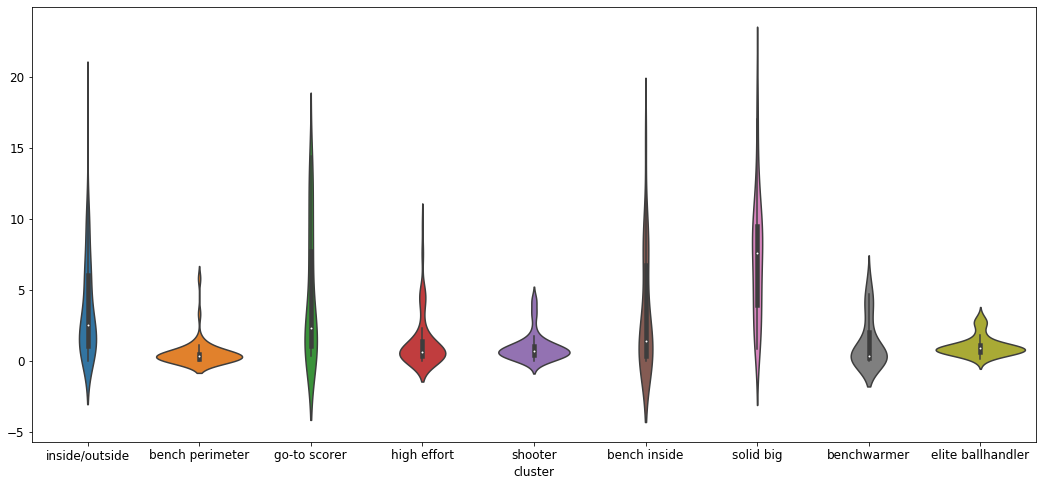

In [546]:
fig = plt.figure(figsize=(18,8))
sns.violinplot(df_18['cluster'],(df_18['SCREEN ASSISTS']+df_18['SCREEN ASSISTS PTS']))



In [543]:
len(x18.columns)

52